# R0 Analysis of COVID-19
22 March 2020

Cecilia García López de Munain

## Libraries

In [23]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import pickle
from datetime import timedelta
import datetime

## Parameters

In [24]:
sys.path.append('./')

In [25]:
PATH_ROOT_INPUT_DATA = 'data\\input'
PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME_COVID = 'covid_19_data_cum.pkl'
INTERIM_DATA_NAME_COVID1 = "data_V2_for_change_in_exponential_growth.pkl"
INTERIM_DATA_NAME_GOVM = 'government_measures.csv'

# Pre-Analisis

In [26]:
covid19_data_for_concat = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME_COVID1), "rb" ))

In [27]:
covid19_data_for_concat.index = pd.to_datetime(covid19_data_for_concat.index)

In [28]:
covid19_data_for_concat[(covid19_data_for_concat.CountryExp == "China")].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos
DateRep,,,,,,,,
2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,502.0
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,591.0
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,854.0
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,1318.0
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1957.0


## Import Data

COVID Data

In [29]:
covid19_data = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME_COVID1), "rb" ))

In [30]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos
DateRep,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
covid19_data["activos"] = (covid19_data["activos"]  - covid19_data["NewConfCases"]).where(
    (covid19_data["activos"]  - covid19_data["NewConfCases"])>0,0)

In [32]:
# Not studying conveyance Japan so dropping it 
covid19_data = covid19_data.loc[covid19_data['CountryExp'] != 'Cases on an international conveyance Japan',:]

Government Measures Data

In [33]:
gov_measures = pd.read_csv(os.path.join(PATH_ROOT_INPUT_DATA, INTERIM_DATA_NAME_GOVM))

In [34]:
gov_measures.head()

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42


In [35]:
gov_measures.CountryExp.unique()

array(['Spain', 'Italy', 'France', 'China'], dtype=object)

# Indicator

In [36]:
covid19_data = covid19_data[covid19_data["NewConfCases_cum"]>0]

In [37]:
covid19_data["Infected_per_day"] = covid19_data["NewConfCases"]/covid19_data["activos"].where(covid19_data["activos"]!=0)
covid19_data["Infected_per_day"] = covid19_data["Infected_per_day"].fillna(0)

In [38]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day
DateRep,,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
covid19_data[(covid19_data["activos"] == 0) & (covid19_data["NewConfCases"] != 0)].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day
DateRep,,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-03-09,Albania,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-02-25,Algeria,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-03-02,Andorra,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
covid19_data[covid19_data.CountryExp == "China"]

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day
DateRep,,,,,,,,,
2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,0.0,0.000000
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,499.0,0.184369
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,577.0,0.480069
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,835.0,0.578443
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365
...,...,...,...,...,...,...,...,...,...
2020-04-02,China,82432.0,3322.0,76565.0,71.0,6.0,160.0,2474.0,0.028698
2020-04-03,China,82511.0,3326.0,76760.0,79.0,4.0,195.0,2346.0,0.033674
2020-04-04,China,82543.0,3330.0,76946.0,32.0,4.0,186.0,2235.0,0.014318


### Have to take care of the "infected_per_day" in the first day we have data as it will always be 1

## Join datasets

In [41]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day
DateRep,,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
covid19_data.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day
DateRep,,,,,,,,,
2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
# Filter countries in Government Measures
covid19_data_filtered = covid19_data[covid19_data['CountryExp'].isin(list(gov_measures['CountryExp'].unique()))]

covid19_data_filtered = covid19_data_filtered[covid19_data_filtered['NewConfCases']>0].reset_index()[['CountryExp', "DateRep"]].groupby('CountryExp').min().reset_index()

In [44]:
covid19_data_filtered.head()

,CountryExp,DateRep
0,China,2020-01-22
1,France,2020-01-24
2,Italy,2020-01-31
3,Spain,2020-02-01


In [45]:
covid19_data_filtered.CountryExp.unique()

array(['China', 'France', 'Italy', 'Spain'], dtype=object)

In [46]:
gov_measures.CountryExp.unique()

array(['Spain', 'Italy', 'France', 'China'], dtype=object)

In [47]:
covid19_data.CountryExp.unique()

array([' Azerbaijan', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Esw

In [48]:
covid19_data_filtered.head()

,CountryExp,DateRep
0,China,2020-01-22
1,France,2020-01-24
2,Italy,2020-01-31
3,Spain,2020-02-01


In [49]:
gov_measures.head()

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42


In [50]:
covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')

In [51]:
covid19_data_filtered.head(30)

,CountryExp,DateRep,Government Measure,DaysFromFirst
0,China,2020-01-22,Recomendación de aislamiento,23
1,China,2020-01-22,Limitaciones drásticas al transporte,24
2,China,2020-01-22,Cierre de espectáculos,24
3,China,2020-01-22,Cierre de escuelas,27
4,China,2020-01-22,Bloqueo de ciudades afectadas,34
5,China,2020-01-22,Apertura de clases en algunas provincias,72
6,France,2020-01-24,Cierre de espectáculos,43
7,France,2020-01-24,Recomendación de aislamiento,51
8,France,2020-01-24,Licencias y home office,51
9,France,2020-01-24,Cierre de escuelas,51


In [52]:
# covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')
# covid19_data_filtered.loc[:,'DateRep'] 

covid19_data_filtered.loc[:,'DayOfGovM'] = pd.to_datetime(covid19_data_filtered.loc[:,'DateRep']) + pd.to_timedelta(covid19_data_filtered.loc[:,'DaysFromFirst'], unit='D')

In [53]:
covid19_data_filtered.head()

,CountryExp,DateRep,Government Measure,DaysFromFirst,DayOfGovM
0,China,2020-01-22,Recomendación de aislamiento,23,2020-02-14
1,China,2020-01-22,Limitaciones drásticas al transporte,24,2020-02-15
2,China,2020-01-22,Cierre de espectáculos,24,2020-02-15
3,China,2020-01-22,Cierre de escuelas,27,2020-02-18
4,China,2020-01-22,Bloqueo de ciudades afectadas,34,2020-02-25


In [54]:
covid19_data_filtered["DayOfGovM"] = pd.to_datetime(covid19_data_filtered["DayOfGovM"])

In [55]:
covid19_data = covid19_data.reset_index()
covid19_data["DateRep"] = pd.to_datetime(covid19_data["DateRep"])

In [56]:
covid19_data_filtered.head()

,CountryExp,DateRep,Government Measure,DaysFromFirst,DayOfGovM
0,China,2020-01-22,Recomendación de aislamiento,23,2020-02-14
1,China,2020-01-22,Limitaciones drásticas al transporte,24,2020-02-15
2,China,2020-01-22,Cierre de espectáculos,24,2020-02-15
3,China,2020-01-22,Cierre de escuelas,27,2020-02-18
4,China,2020-01-22,Bloqueo de ciudades afectadas,34,2020-02-25


In [57]:
covid19_data.head()

,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day
0,2020-02-28,Azerbaijan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2020-02-25,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2020-02-26,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2020-02-27,Afghanistan,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
covid19_data = covid19_data[covid19_data.CountryExp.isin((list(gov_measures['CountryExp'].unique())))]

In [59]:
covid19_data_withgovm = pd.merge(covid19_data, covid19_data_filtered, left_on=['CountryExp','DateRep'], right_on=['CountryExp','DayOfGovM'], how='left')

In [60]:
covid19_data_withgovm.head()

,DateRep_x,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
0,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,0.0,0.000000,NaN,NaN,NaN,NaT
1,2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,499.0,0.184369,NaN,NaN,NaN,NaT
2,2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,577.0,0.480069,NaN,NaN,NaN,NaT
3,2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,835.0,0.578443,NaN,NaN,NaN,NaT
4,2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,NaN,NaN,NaN,NaT


In [61]:
covid19_data_withgovm.rename(columns={"DateRep_x":"DateRep"}, inplace=True)
covid19_data_withgovm.set_index("DateRep", inplace=True)

In [62]:
covid19_data_withgovm.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,0.0,0.000000,NaN,NaN,NaN,NaT
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,499.0,0.184369,NaN,NaN,NaN,NaT
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,577.0,0.480069,NaN,NaN,NaN,NaT
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,835.0,0.578443,NaN,NaN,NaN,NaT
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,NaN,NaN,NaN,NaT


In [63]:
covid19_data_withgovm.CountryExp.unique()

array(['China', 'France', 'Italy', 'Spain'], dtype=object)

In [64]:
covid19_data.CountryExp.unique()

array(['China', 'France', 'Italy', 'Spain'], dtype=object)

## Prepearing dictionaries for future plots

In [65]:
gov_measures.head(20)

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42
5,Spain,Restricciones al transporte público,46
6,Spain,Limitaciones drásticas al transporte,48
7,Italy,Recomendación de aislamiento,1
8,Italy,Bloqueo de ciudades afectadas,23
9,Italy,Cierre de escuelas,35


In [66]:
list_of_measures = gov_measures.loc[:,'Government Measure'].unique()
list_of_countries =  list(covid19_data_withgovm.loc[:,'CountryExp'].unique())

In [67]:
measures_countries = {y:[x for x in gov_measures[gov_measures.CountryExp == y]["Government Measure"]] for y in list_of_countries}

In [68]:
measures_countries

{'China': ['Recomendación de aislamiento',
  'Limitaciones drásticas al transporte',
  'Cierre de espectáculos',
  'Cierre de escuelas',
  'Bloqueo de ciudades afectadas',
  'Apertura de clases en algunas provincias'],
 'France': ['Cierre de espectáculos',
  'Recomendación de aislamiento',
  'Licencias y home office',
  'Cierre de escuelas'],
 'Italy': ['Recomendación de aislamiento',
  'Bloqueo de ciudades afectadas',
  'Cierre de escuelas',
  'Cierre de espectáculos',
  'Cierre de fronteras',
  'Limitaciones drásticas al transporte',
  'Licencias y home office'],
 'Spain': ['Alerta Epidemiológica',
  'Supervisión de ingreso de pasajeros',
  'Cierre de escuelas',
  'Licencias y home office',
  'Cierre de espectáculos',
  'Restricciones al transporte público',
  'Limitaciones drásticas al transporte']}

## Some Plotting

In [125]:
def nearest(dates, date):
    return min(dates.index, key=lambda x: abs(x - date))

China
Recomendación de aislamiento en  China  : 2020-02-14T00:00:00.000000000 con  66292.0 casos confirmados.


c:\users\g.martinez.bidal\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
<ipython-input-70-4371832b0efd>:24: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


Limitaciones drásticas al transporte en  China  : 2020-02-15T00:00:00.000000000 con  68347.0 casos confirmados.
Cierre de espectáculos en  China  : 2020-02-15T00:00:00.000000000 con  68347.0 casos confirmados.
Cierre de escuelas en  China  : 2020-02-18T00:00:00.000000000 con  74139.0 casos confirmados.
Bloqueo de ciudades afectadas en  China  : 2020-02-25T00:00:00.000000000 con  77660.0 casos confirmados.
Apertura de clases en algunas provincias en  China  : 2020-04-03T00:00:00.000000000 con  82511.0 casos confirmados.
France
Cierre de espectáculos en  France  : 2020-03-07T00:00:00.000000000 con  949.0 casos confirmados.
Recomendación de aislamiento en  France  : 2020-03-15T00:00:00.000000000 con  4513.0 casos confirmados.
Licencias y home office en  France  : 2020-03-15T00:00:00.000000000 con  4513.0 casos confirmados.
Cierre de escuelas en  France  : 2020-03-15T00:00:00.000000000 con  4513.0 casos confirmados.
Italy
Recomendación de aislamiento en  Italy  : 2020-02-01T00:00:00.000000

<ipython-input-70-4371832b0efd>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(12, 7))


Cierre de espectáculos en  Spain  : 2020-03-14T00:00:00.000000000 con  6391.0 casos confirmados.
Restricciones al transporte público en  Spain  : 2020-03-18T00:00:00.000000000 con  13910.0 casos confirmados.
Limitaciones drásticas al transporte en  Spain  : 2020-03-20T00:00:00.000000000 con  20410.0 casos confirmados.


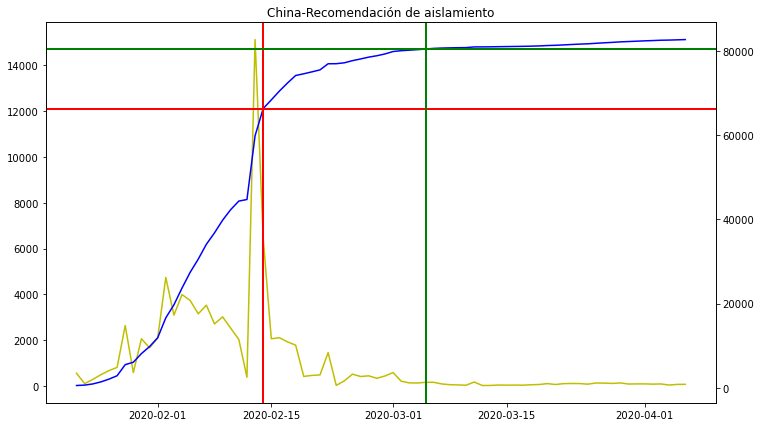

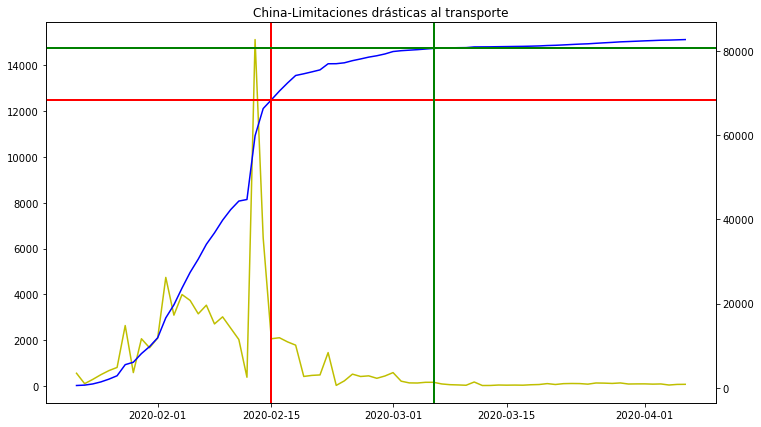

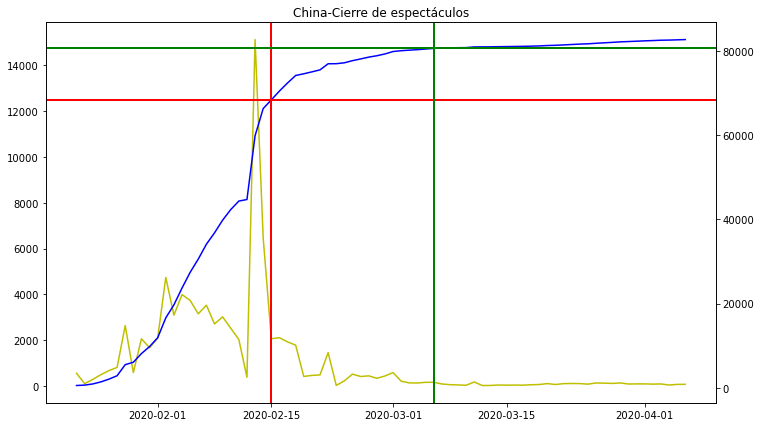

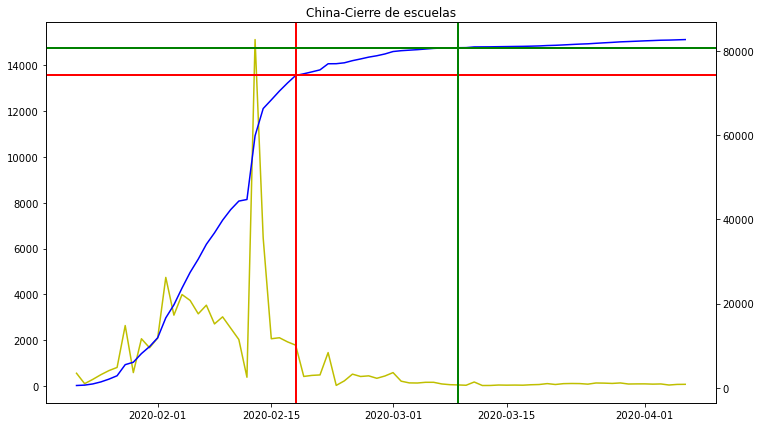

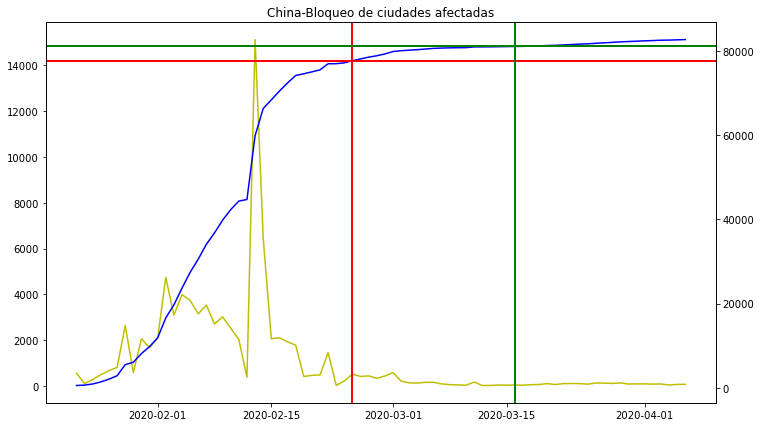

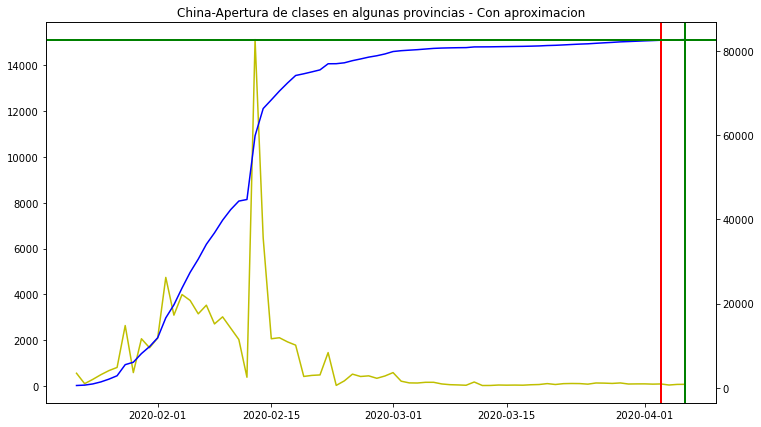

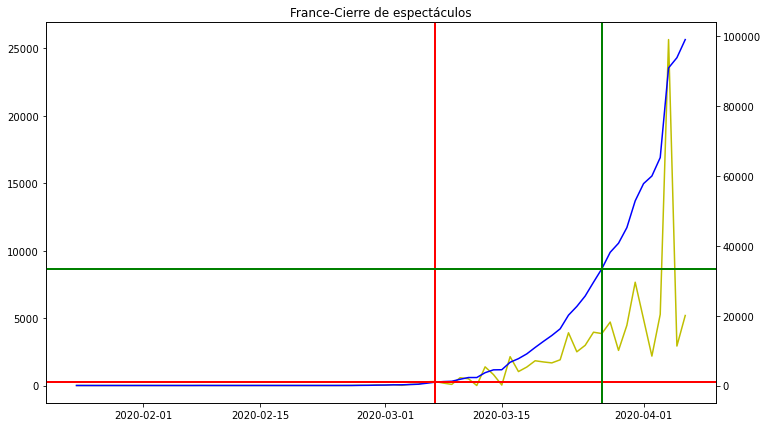

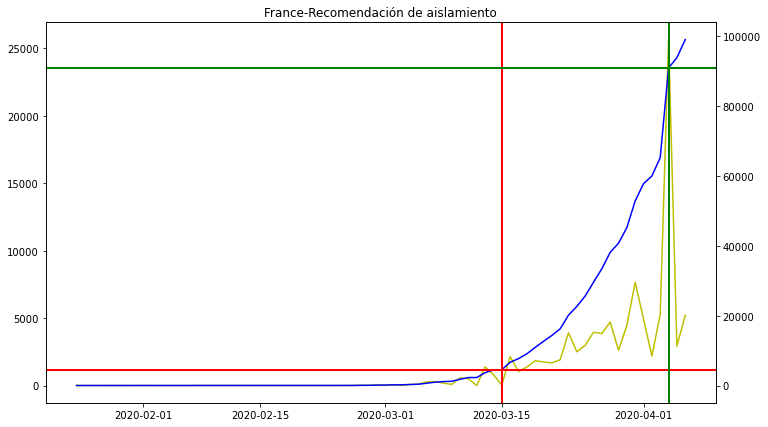

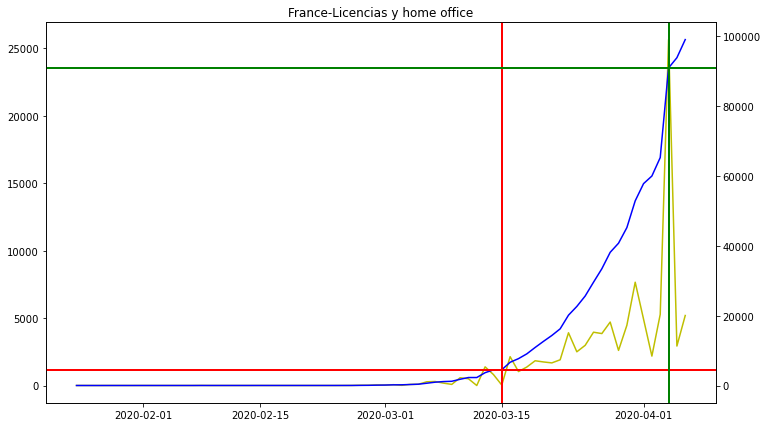

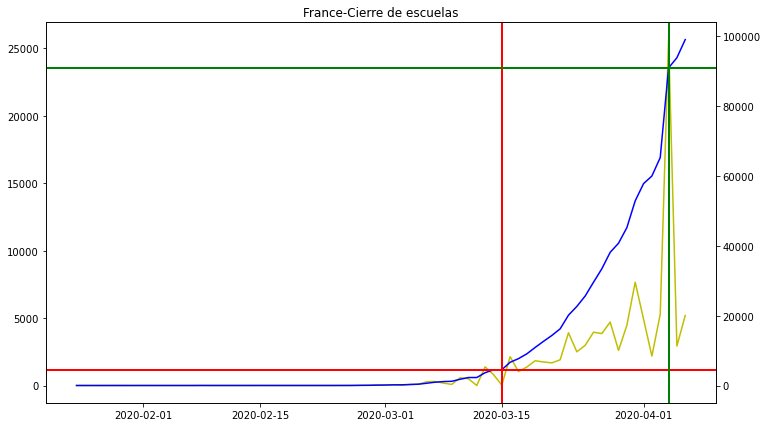

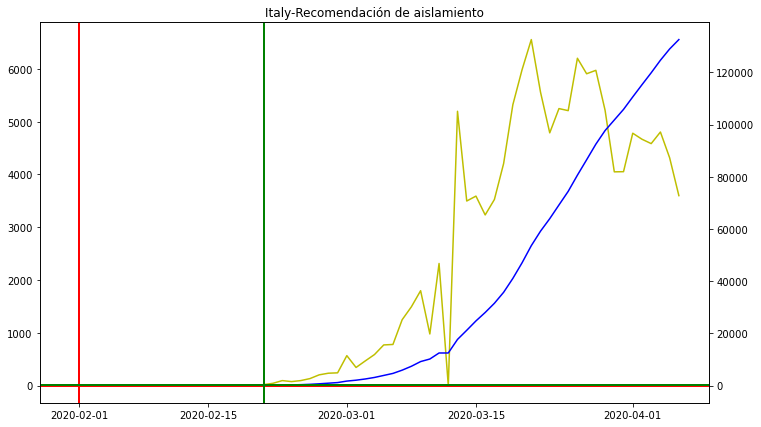

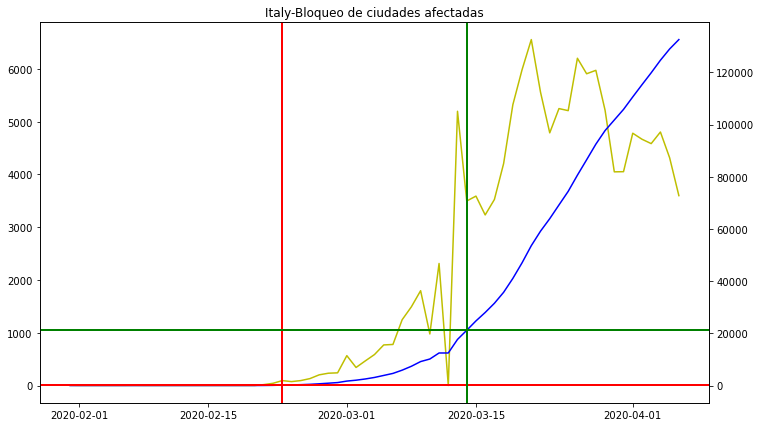

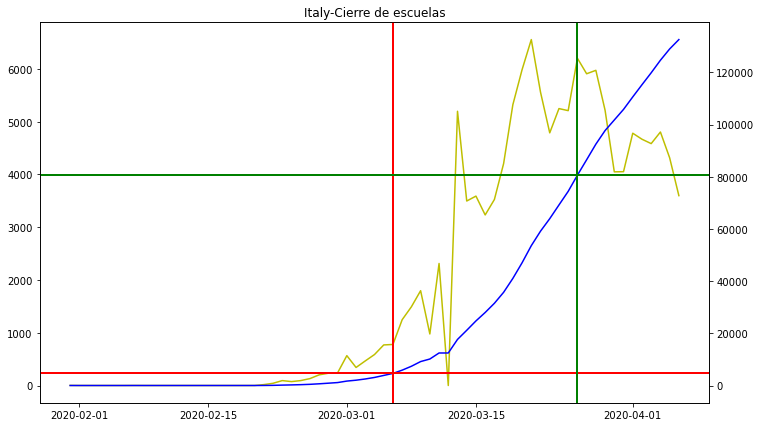

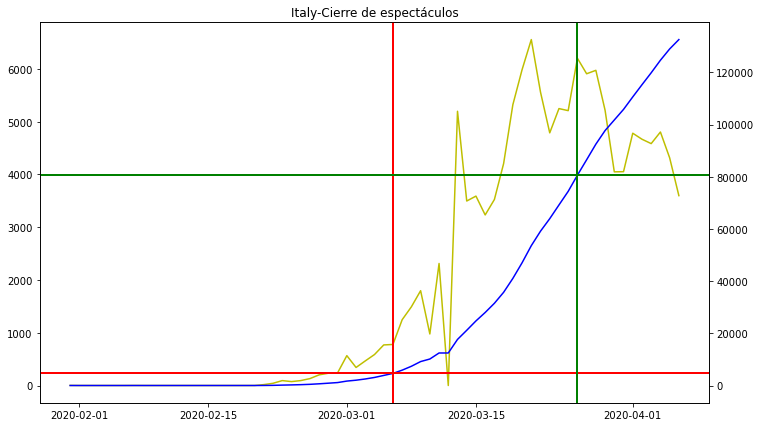

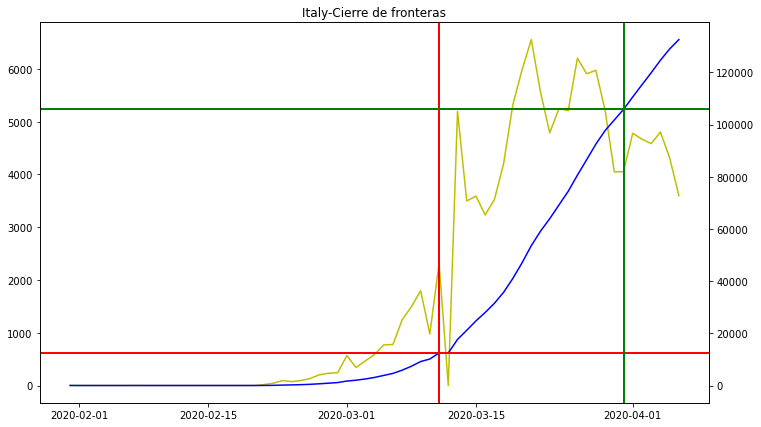

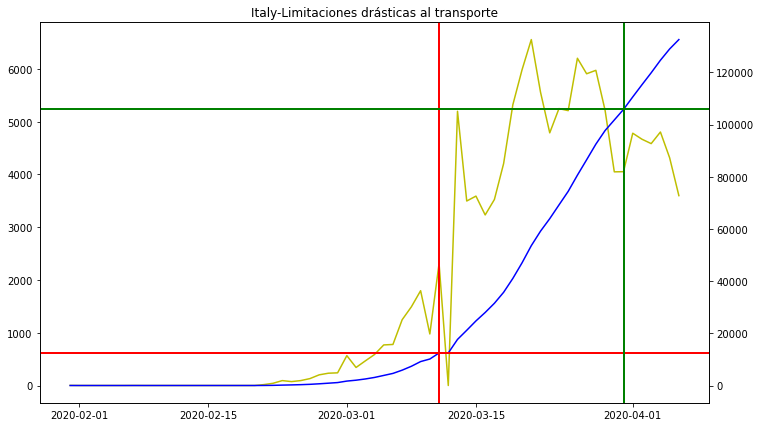

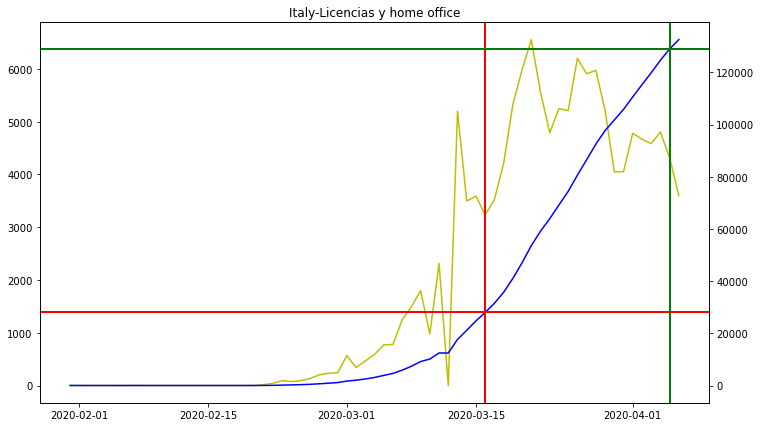

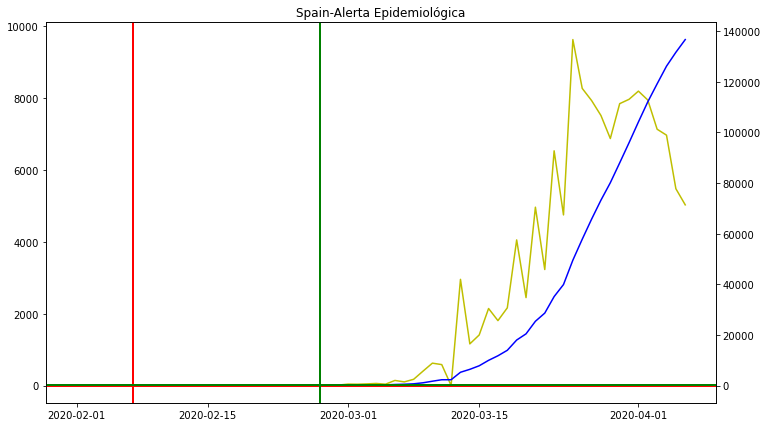

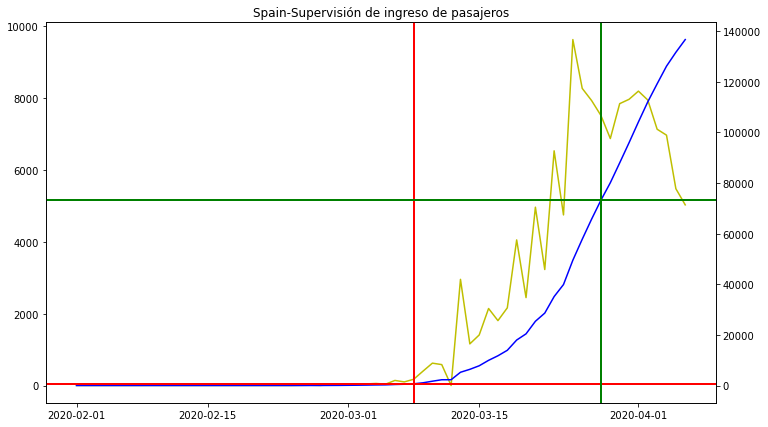

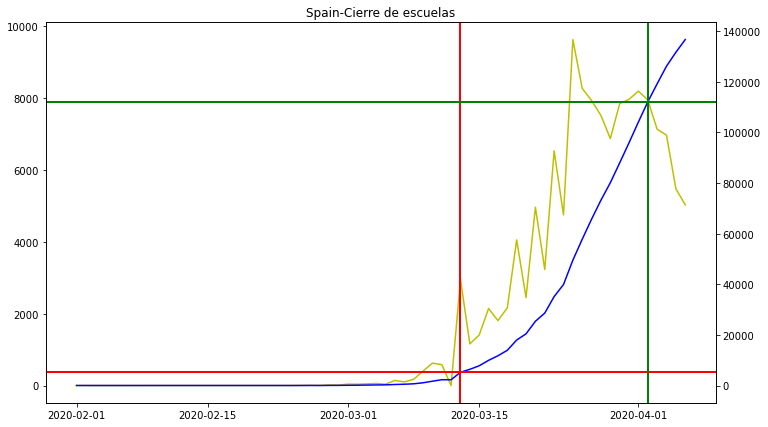

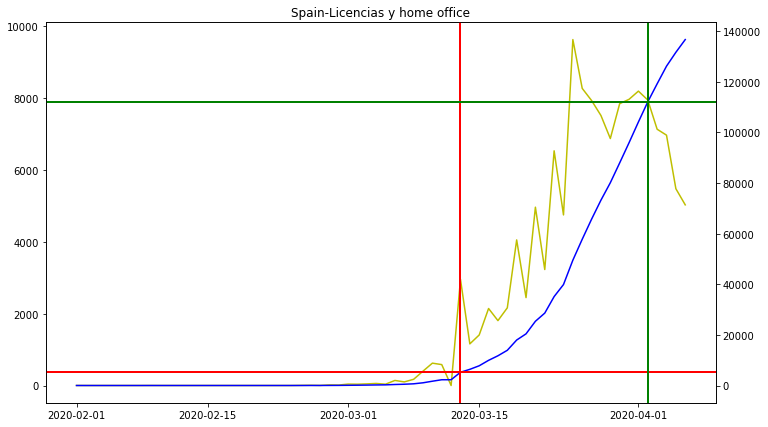

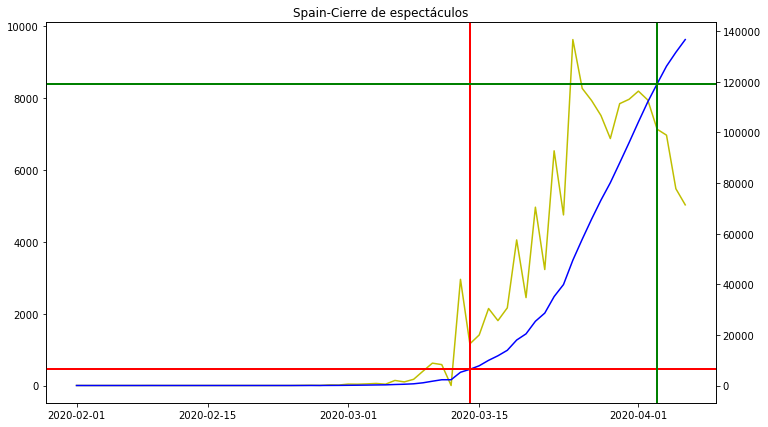

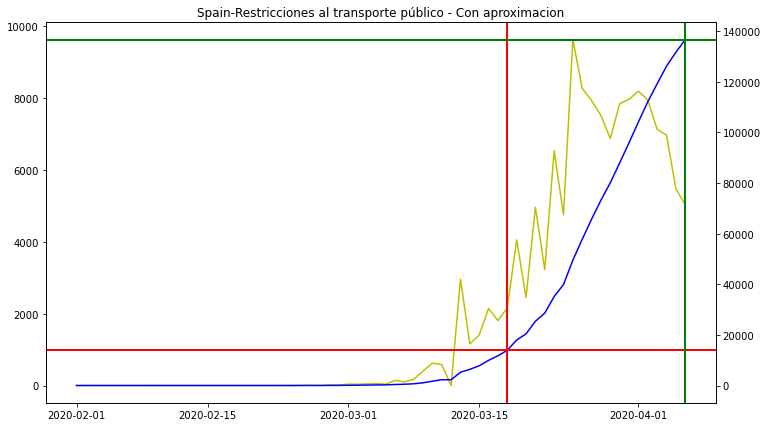

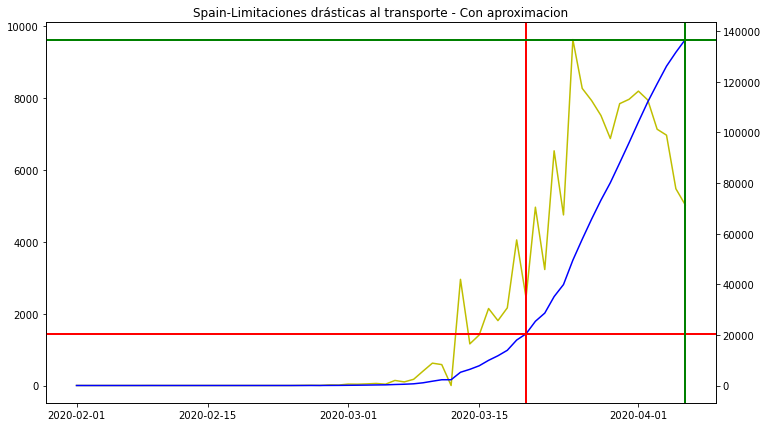

In [70]:
for country,medidas in measures_countries.items():
    print(country)
    for measure in medidas:
        event = covid19_data_withgovm.loc[(covid19_data_withgovm.loc[:,'Government Measure']==measure)
                                          & (covid19_data_withgovm.loc[:,'CountryExp']==country),'NewConfCases_cum']
        if len(event)>0:

            fig, ax1 = plt.subplots(figsize=(12, 7))

            ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases'], color='y')
                        
            ax2 = ax1.twinx()

            ax2.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases_cum'], color='b')

            print(measure, 'en ', country,' :', event.index.values[0], 'con ', event.values[0], 'casos confirmados.')

            plt.axvline(x=event.index, linewidth=2, color='r') 
            plt.axhline(y=event.values, linewidth=2, color='r') 

            
            day1 = event.index + datetime.timedelta(days=20)
            day = day1.values[0]
            ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
            day = datetime.datetime.utcfromtimestamp(ts)
            day = nearest(covid19_data_withgovm, day1)
            if day != day1:
                plt.axvline(x=day, linewidth=2, color='g')
                message = country + '-' + measure + ' - Con aproximacion'
            else:
                plt.axvline(x=day1, linewidth=2, color='g')
                message = country + '-' + measure
            plt.title(message)
            value = covid19_data_withgovm[covid19_data_withgovm.CountryExp == country].loc[day,"NewConfCases_cum"]
            plt.axhline(y=value, linewidth=2, color='g')


<ipython-input-71-e7e2c200ad23>:17: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
<ipython-input-71-e7e2c200ad23>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(12, 7))


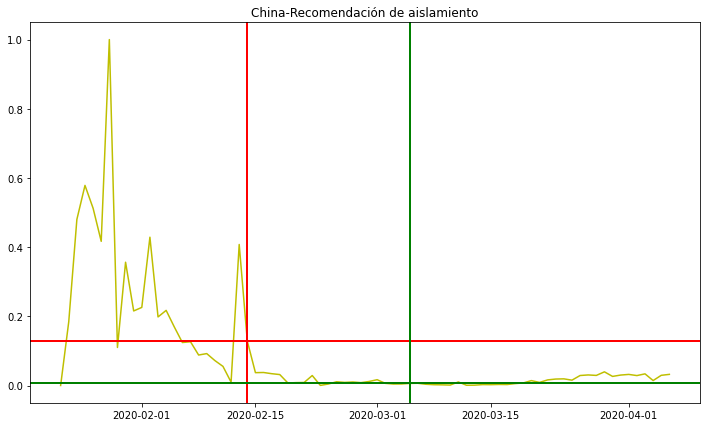

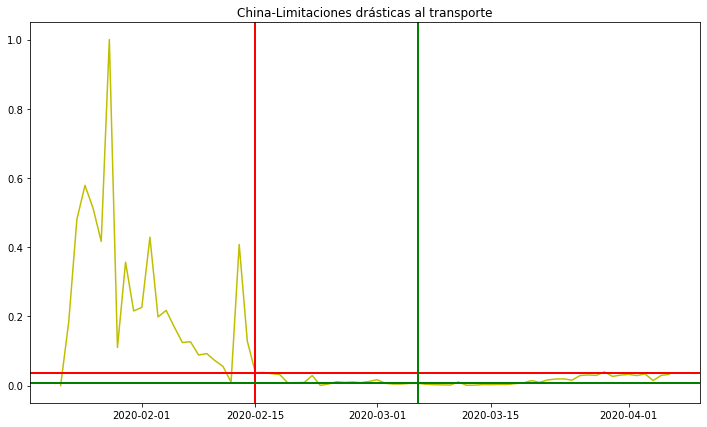

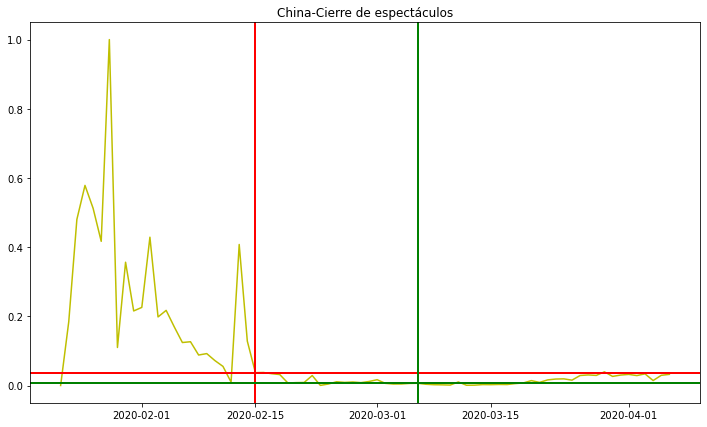

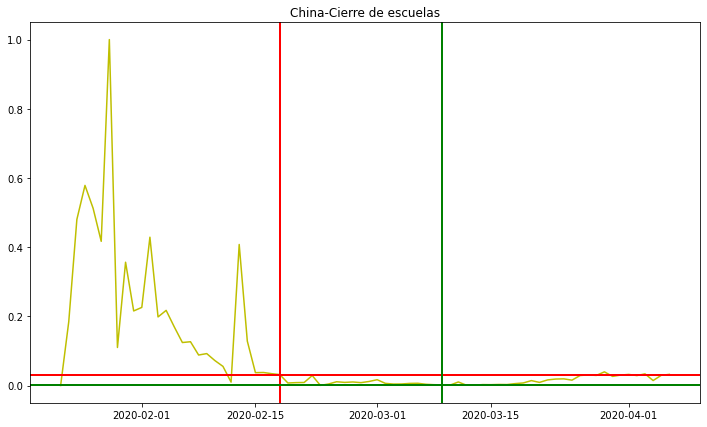

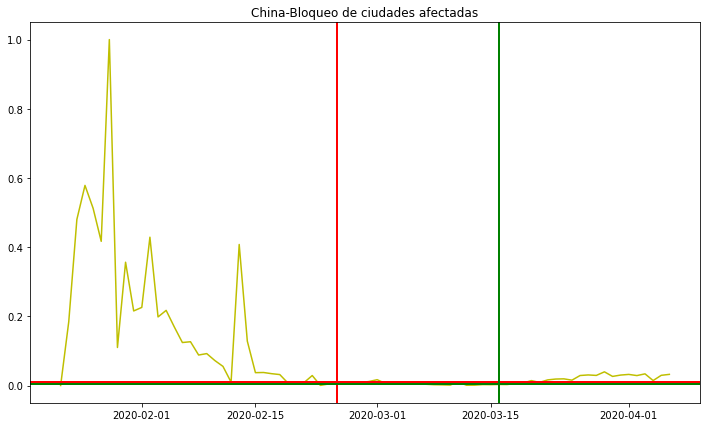

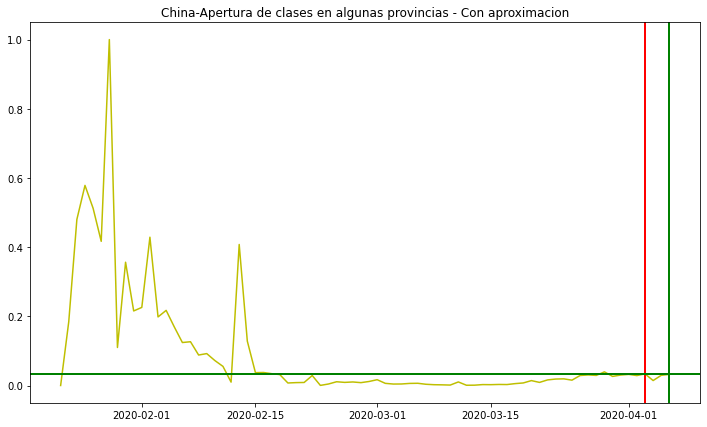

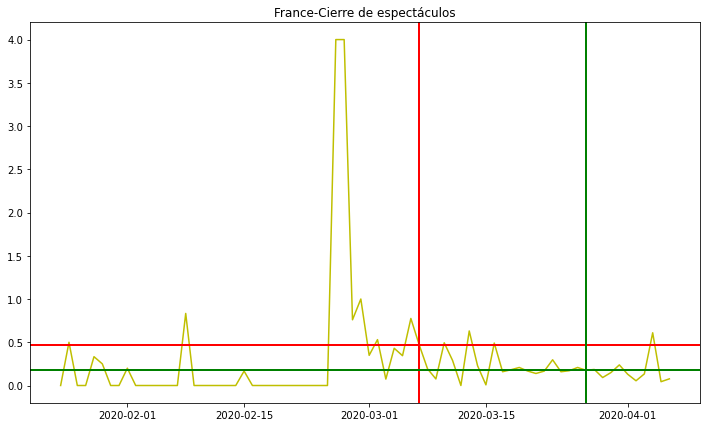

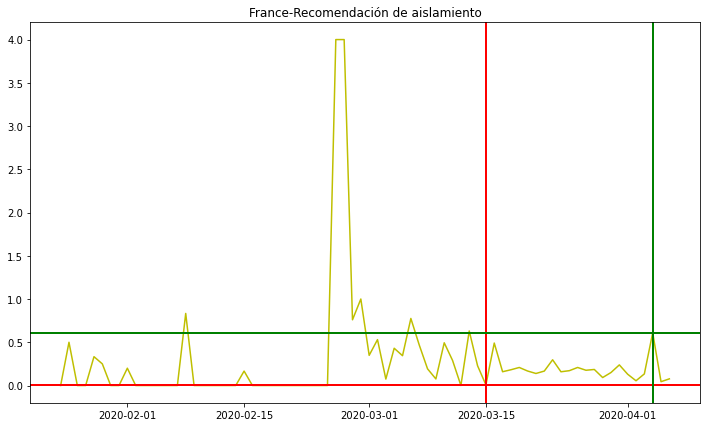

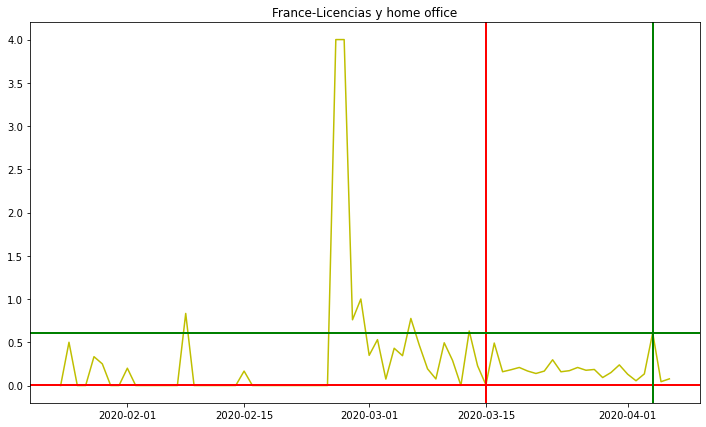

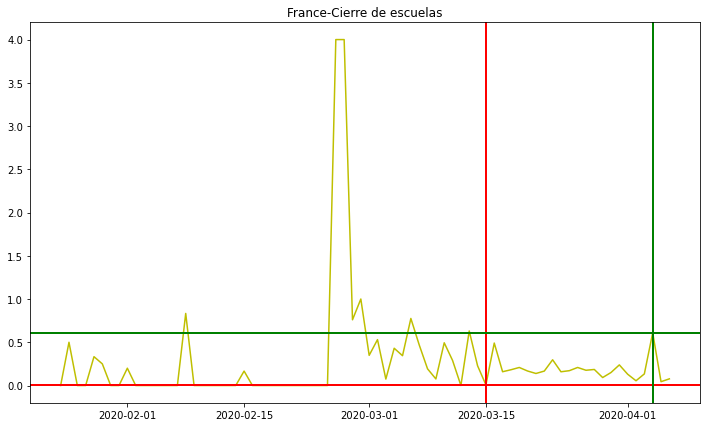

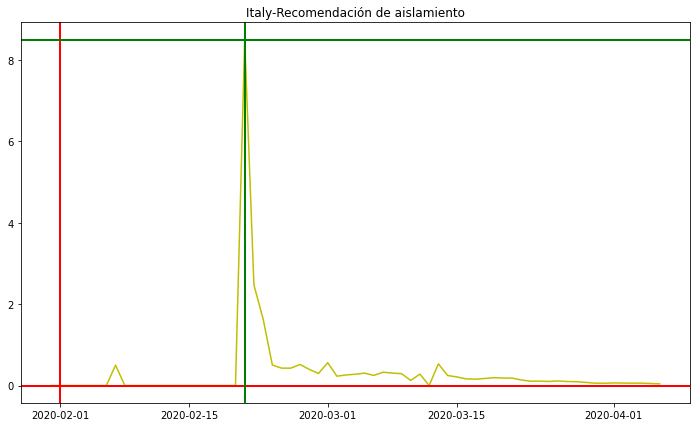

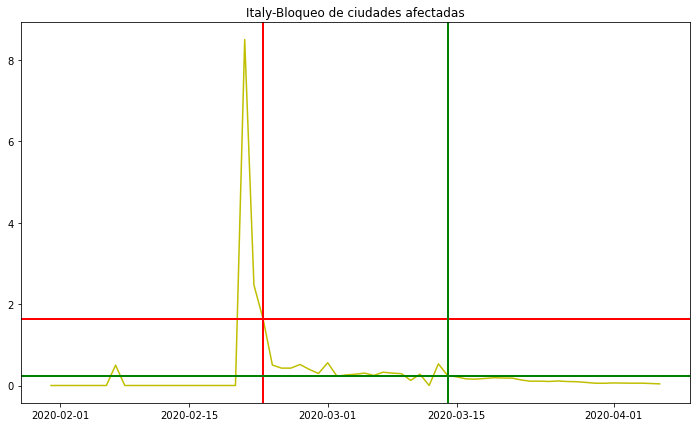

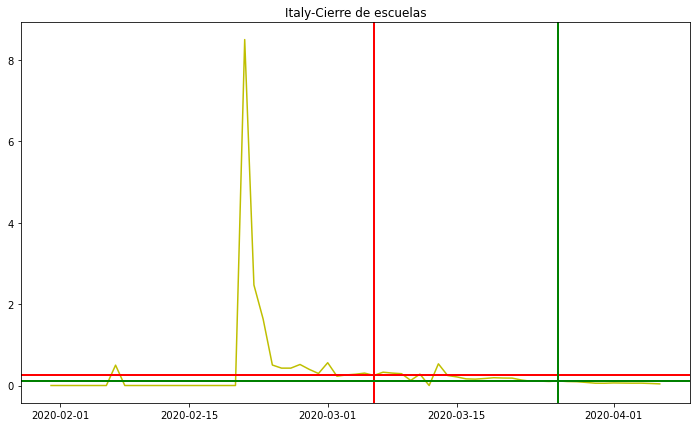

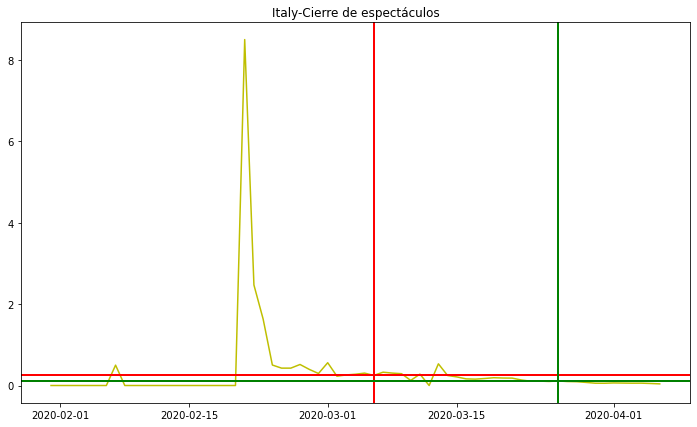

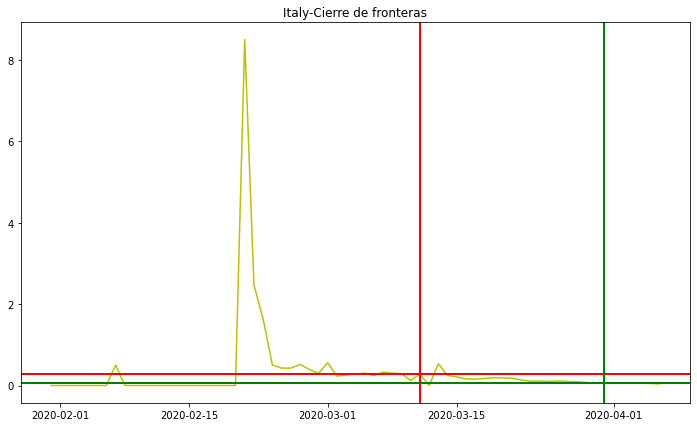

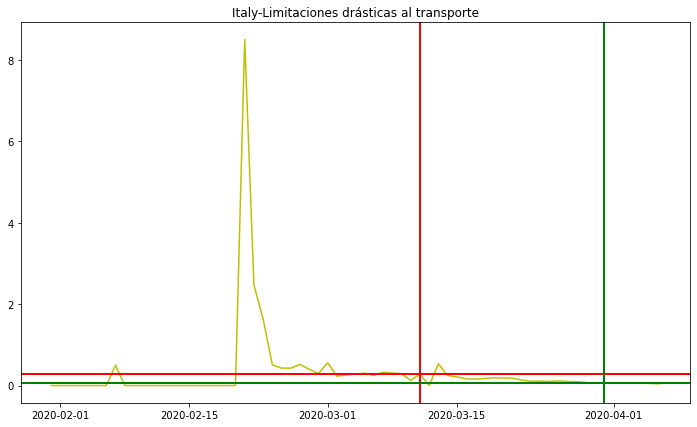

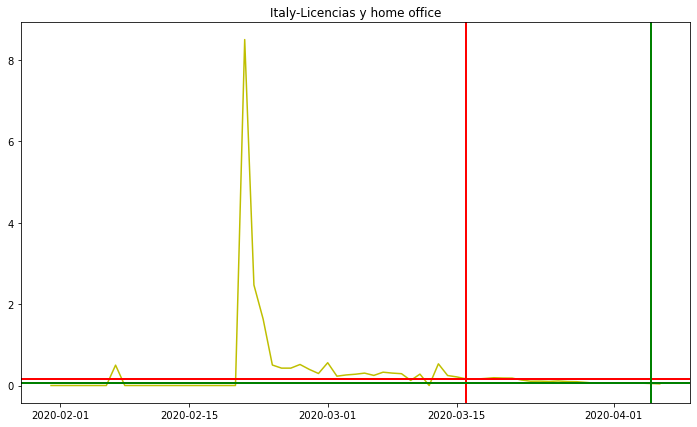

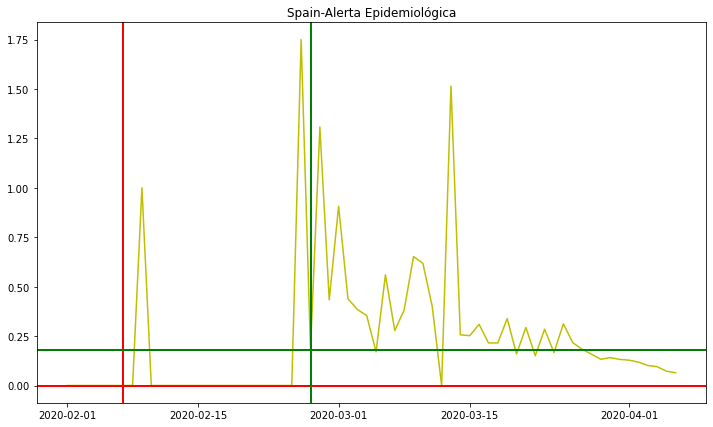

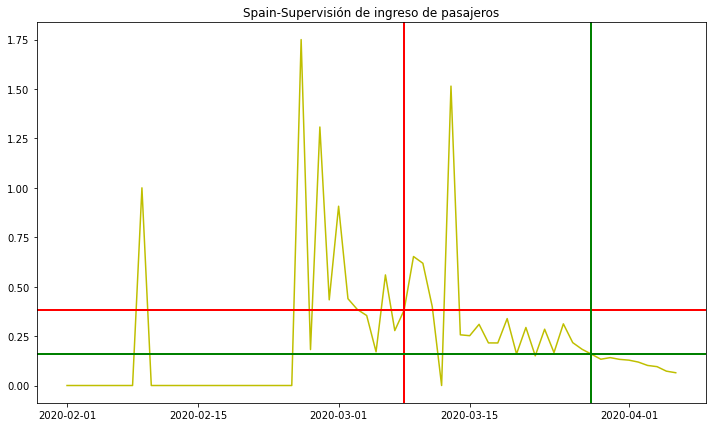

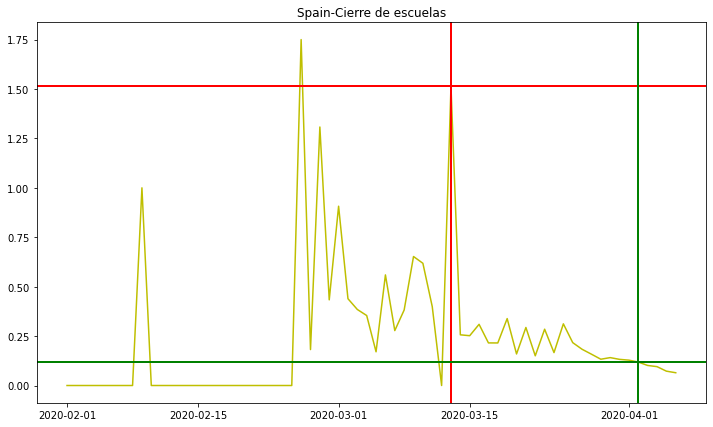

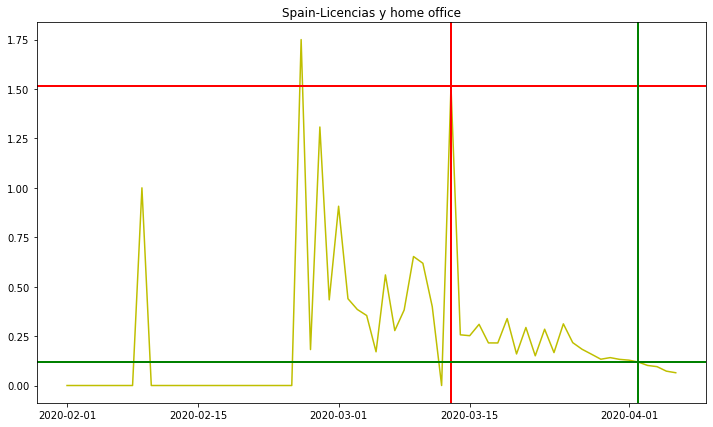

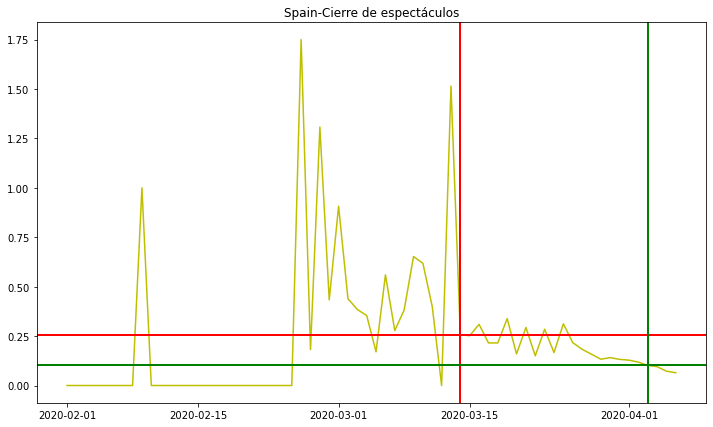

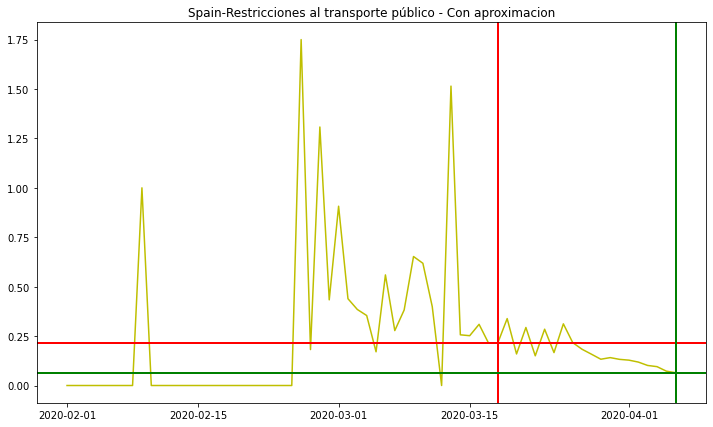

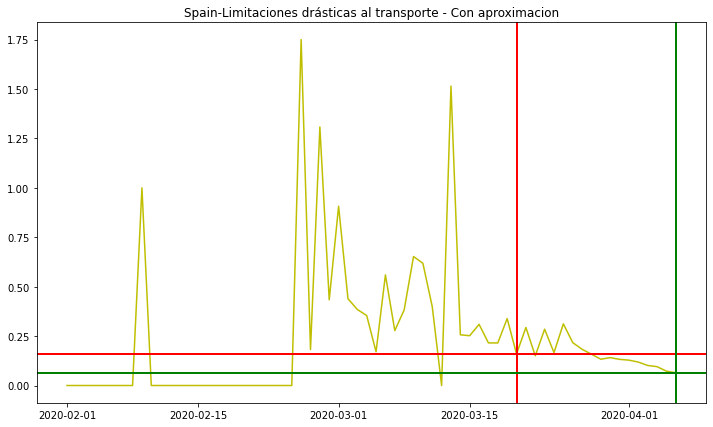

In [71]:
for country,medidas in measures_countries.items():
    for measure in medidas:
        event = covid19_data_withgovm.loc[(covid19_data_withgovm.loc[:,'Government Measure']==measure)
                                          & (covid19_data_withgovm.loc[:,'CountryExp']==country),'Infected_per_day']
        if len(event)>0:

            fig, ax1 = plt.subplots(figsize=(12, 7))

            ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'Infected_per_day'], color='y')
            
            plt.axvline(x=event.index, linewidth=2, color='r') 
            plt.axhline(y=event.values, linewidth=2, color='r') 

            
            day1 = event.index + datetime.timedelta(days=20)
            day = day1.values[0]
            ts = (day - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
            day = datetime.datetime.utcfromtimestamp(ts)
            day = nearest(covid19_data_withgovm, day1)
            if day != day1:
                plt.axvline(x=day, linewidth=2, color='g')
                message = country + '-' + measure + ' - Con aproximacion'
            else:
                plt.axvline(x=day1, linewidth=2, color='g')
                message = country + '-' + measure
            plt.title(message)
            value = covid19_data_withgovm[covid19_data_withgovm.CountryExp == country].loc[day,"Infected_per_day"]
            plt.axhline(y=value, linewidth=2, color='g')

In [72]:
covid19_data_withgovm.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,0.0,0.000000,NaN,NaN,NaN,NaT
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,499.0,0.184369,NaN,NaN,NaN,NaT
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,577.0,0.480069,NaN,NaN,NaN,NaT
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,835.0,0.578443,NaN,NaN,NaN,NaT
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,NaN,NaN,NaN,NaT


### Compute effects of gov measures

In [73]:
covid19_data_withgovm.groupby("CountryExp").count()["NewConfCases_cum"]

CountryExp
China     77
France    76
Italy     69
Spain     67
Name: NewConfCases_cum, dtype: int64

In [74]:
covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']=='China',:]

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,0.0,0.000000,NaN,NaN,NaN,NaT
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,499.0,0.184369,NaN,NaN,NaN,NaT
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,577.0,0.480069,NaN,NaN,NaN,NaT
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,835.0,0.578443,NaN,NaN,NaN,NaT
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-02,China,82432.0,3322.0,76565.0,71.0,6.0,160.0,2474.0,0.028698,NaN,NaN,NaN,NaT
2020-04-03,China,82511.0,3326.0,76760.0,79.0,4.0,195.0,2346.0,0.033674,2020-01-22,Apertura de clases en algunas provincias,72.0,2020-04-03
2020-04-04,China,82543.0,3330.0,76946.0,32.0,4.0,186.0,2235.0,0.014318,NaN,NaN,NaN,NaT


In [75]:
# Consolidate effects of government measures on growth
measures_effect = covid19_data_withgovm.loc[~covid19_data_withgovm.loc[:,'Government Measure'].isna(),['CountryExp','Government Measure','DaysFromFirst']]

In [76]:
measures_effect

,CountryExp,Government Measure,DaysFromFirst
DateRep,,,
2020-02-14,China,Recomendación de aislamiento,23.0
2020-02-15,China,Limitaciones drásticas al transporte,24.0
2020-02-15,China,Cierre de espectáculos,24.0
2020-02-18,China,Cierre de escuelas,27.0
2020-02-25,China,Bloqueo de ciudades afectadas,34.0
2020-04-03,China,Apertura de clases en algunas provincias,72.0
2020-03-07,France,Cierre de espectáculos,43.0
2020-03-15,France,Recomendación de aislamiento,51.0
2020-03-15,France,Licencias y home office,51.0


In [77]:
covid19_data_withgovm.head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,0.0,0.000000,NaN,NaN,NaN,NaT
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,499.0,0.184369,NaN,NaN,NaN,NaT
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,577.0,0.480069,NaN,NaN,NaN,NaT
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,835.0,0.578443,NaN,NaN,NaN,NaT
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,NaN,NaN,NaN,NaT


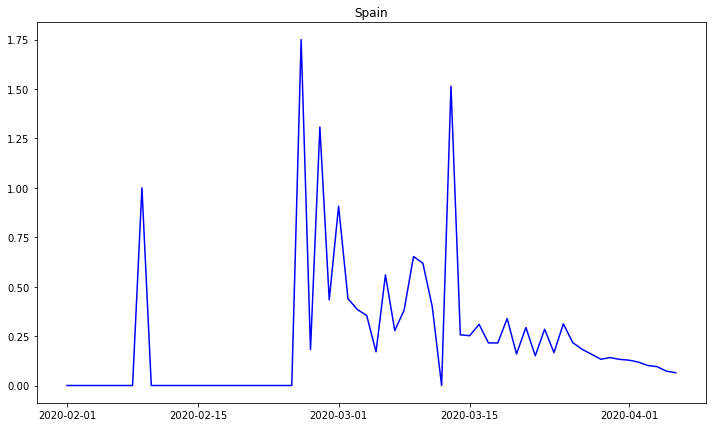

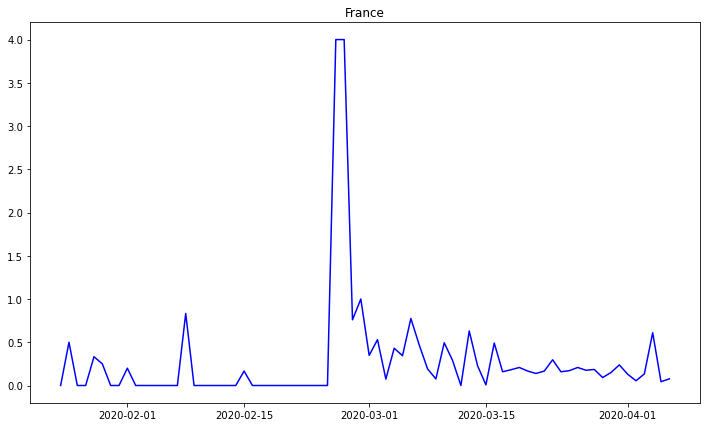

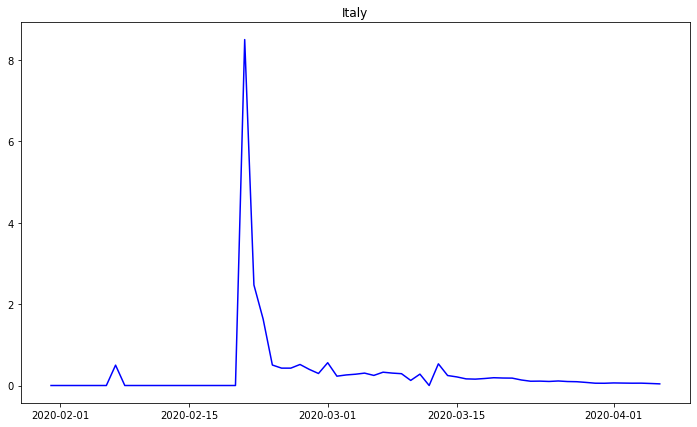

In [78]:
for country in ['Spain', 'France', 'Italy']:
        fig, ax1 = plt.subplots(figsize=(12, 7))

        ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'Infected_per_day'], color='b')
        plt.title(country)

# We analyze the delay of europe

In [79]:
def europe_gra(data,country):
    fig, ax1 = plt.subplots(figsize=(12, 7))
    for i in [["NewConfCases_cum",'r'], ["activos",'b']]:
        ax1.plot(data[i[0]], color=i[1], label=i[0])
    ax2 = ax1.twinx()
    for j in [["Infected_per_day",'g']]:
        ax2.plot(data[j[0]], color=j[1], label=j[0])
    ax2.legend()
    ax1.legend()
    plt.title(country)

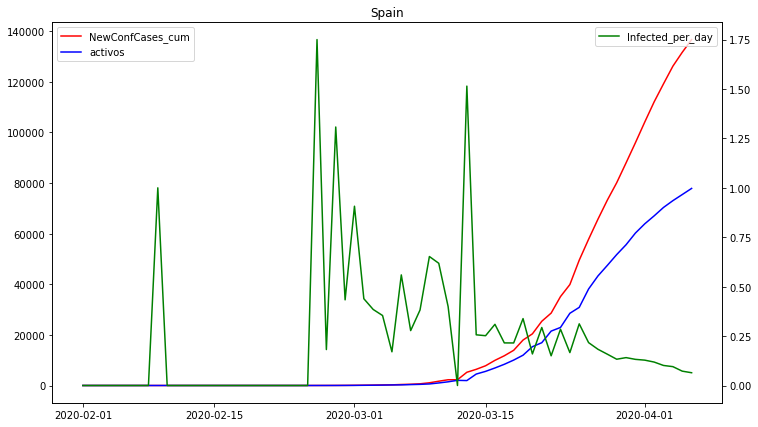

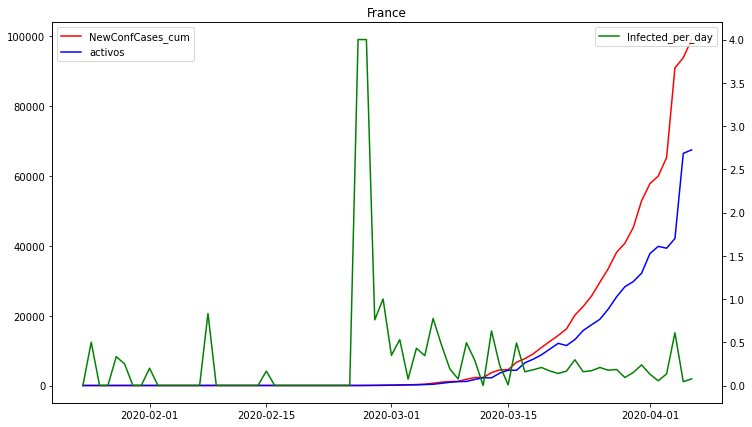

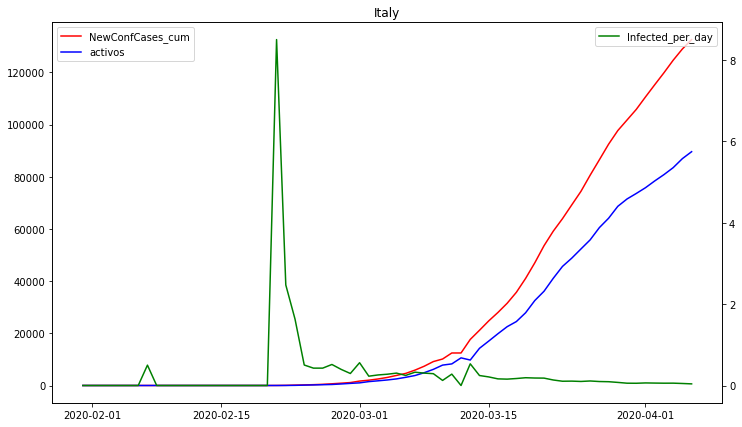

In [80]:
for country in ['Spain', 'France', 'Italy']:
    europe_gra(covid19_data_withgovm[covid19_data_withgovm.CountryExp == country], country)

# All of the countries have a delay in new cases after the first cases

In [81]:
covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == 'France'].head(50)

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-01-24,France,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaT
2020-01-25,France,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,NaN,NaN,NaN,NaT
2020-01-26,France,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,NaN,NaN,NaN,NaT
2020-01-27,France,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,NaN,NaN,NaN,NaT
2020-01-28,France,4.0,0.0,0.0,1.0,0.0,0.0,3.0,0.333333,NaN,NaN,NaN,NaT
2020-01-29,France,5.0,0.0,0.0,1.0,0.0,0.0,4.0,0.250000,NaN,NaN,NaN,NaT
2020-01-30,France,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,NaN,NaN,NaN,NaT
2020-01-31,France,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.000000,NaN,NaN,NaN,NaT
2020-02-01,France,6.0,0.0,0.0,1.0,0.0,0.0,5.0,0.200000,NaN,NaN,NaN,NaT


In [82]:
covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == 'Italy'].head(50)

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-01-31,Italy,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaT
2020-02-01,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,2020-01-31,Recomendación de aislamiento,1.0,2020-02-01
2020-02-02,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,NaN,NaN,NaN,NaT
2020-02-03,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,NaN,NaN,NaN,NaT
2020-02-04,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,NaN,NaN,NaN,NaT
2020-02-05,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,NaN,NaN,NaN,NaT
2020-02-06,Italy,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,NaN,NaN,NaN,NaT
2020-02-07,Italy,3.0,0.0,0.0,1.0,0.0,0.0,2.0,0.500000,NaN,NaN,NaN,NaT
2020-02-08,Italy,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,NaN,NaN,NaN,NaT


In [83]:
covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == 'Spain'].head(50)

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-02-01,Spain,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaT
2020-02-02,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,NaN,NaT
2020-02-03,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,NaN,NaT
2020-02-04,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,NaN,NaT
2020-02-05,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,NaN,NaT
2020-02-06,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,NaN,NaT
2020-02-07,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,2020-02-01,Alerta Epidemiológica,6.0,2020-02-07
2020-02-08,Spain,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,NaN,NaN,NaT
2020-02-09,Spain,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,NaN,NaN,NaN,NaT


# Calculate Measure effect

In [84]:
df_dic={"China":covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == "China"].copy(),
       "Spain":covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == "Spain"].copy(),
       "Italy":covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == "Italy"].copy(),
       "France":covid19_data_withgovm[covid19_data_withgovm["CountryExp"] == "France"].copy(),
       }

In [85]:
df_dic["China"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,0.0,0.000000,NaN,NaN,NaN,NaT
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,499.0,0.184369,NaN,NaN,NaN,NaT
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,577.0,0.480069,NaN,NaN,NaN,NaT
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,835.0,0.578443,NaN,NaN,NaN,NaT
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,NaN,NaN,NaN,NaT


In [86]:
for country,df in df_dic.items():
    if country != "China":
        limite_date = df[df["Infected_per_day"] == df.groupby("CountryExp").max().reset_index()["Infected_per_day"][0]].index[0]
        print(limite_date)
        df_dic[country] = df.loc[limite_date:]

2020-02-26 00:00:00
2020-02-21 00:00:00
2020-02-26 00:00:00


In [87]:
#Have to eliminate the first value of China as it generates an error for the initial value of NewConfCasesCum
df_dic["China"] = df_dic["China"][1:]

In [88]:
df_dic["China"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,499.0,0.184369,NaN,NaN,NaN,NaT
2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,577.0,0.480069,NaN,NaN,NaN,NaT
2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,835.0,0.578443,NaN,NaN,NaN,NaT
2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365,NaN,NaN,NaN,NaT
2020-01-27,China,2863.0,82.0,58.0,801.0,26.0,9.0,1922.0,0.416753,NaN,NaN,NaN,NaT


## Correcting infected per day initial values in europe

In [89]:
df_dic["Spain"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-02-26,Spain,13.0,0.0,2.0,7.0,0.0,0.0,4.0,1.750000,NaN,NaN,NaN,NaT
2020-02-27,Spain,15.0,0.0,2.0,2.0,0.0,0.0,11.0,0.181818,NaN,NaN,NaN,NaT
2020-02-28,Spain,32.0,0.0,2.0,17.0,0.0,0.0,13.0,1.307692,NaN,NaN,NaN,NaT
2020-02-29,Spain,45.0,0.0,2.0,13.0,0.0,0.0,30.0,0.433333,NaN,NaN,NaN,NaT
2020-03-01,Spain,84.0,0.0,2.0,39.0,0.0,0.0,43.0,0.906977,NaN,NaN,NaN,NaT


In [90]:
df_dic["Spain"] = df_dic["Spain"][1:]

In [91]:
df_dic["Spain"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-02-27,Spain,15.0,0.0,2.0,2.0,0.0,0.0,11.0,0.181818,NaN,NaN,NaN,NaT
2020-02-28,Spain,32.0,0.0,2.0,17.0,0.0,0.0,13.0,1.307692,NaN,NaN,NaN,NaT
2020-02-29,Spain,45.0,0.0,2.0,13.0,0.0,0.0,30.0,0.433333,NaN,NaN,NaN,NaT
2020-03-01,Spain,84.0,0.0,2.0,39.0,0.0,0.0,43.0,0.906977,NaN,NaN,NaN,NaT
2020-03-02,Spain,120.0,0.0,2.0,36.0,0.0,0.0,82.0,0.439024,NaN,NaN,NaN,NaT


In [92]:
df_dic["France"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-02-26,France,18.0,2.0,11.0,4.0,1.0,0.0,1.0,4.000000,NaN,NaN,NaN,NaT
2020-02-27,France,38.0,2.0,11.0,20.0,0.0,0.0,5.0,4.000000,NaN,NaN,NaN,NaT
2020-02-28,France,57.0,2.0,11.0,19.0,0.0,0.0,25.0,0.760000,NaN,NaN,NaN,NaT
2020-02-29,France,100.0,2.0,12.0,43.0,0.0,1.0,43.0,1.000000,NaN,NaN,NaN,NaT
2020-03-01,France,130.0,2.0,12.0,30.0,0.0,0.0,86.0,0.348837,NaN,NaN,NaN,NaT


In [93]:
df_dic["France"] = df_dic["France"][2:]

In [94]:
df_dic["France"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-02-28,France,57.0,2.0,11.0,19.0,0.0,0.0,25.0,0.760000,NaN,NaN,NaN,NaT
2020-02-29,France,100.0,2.0,12.0,43.0,0.0,1.0,43.0,1.000000,NaN,NaN,NaN,NaT
2020-03-01,France,130.0,2.0,12.0,30.0,0.0,0.0,86.0,0.348837,NaN,NaN,NaN,NaT
2020-03-02,France,191.0,3.0,12.0,61.0,1.0,0.0,115.0,0.530435,NaN,NaN,NaN,NaT
2020-03-03,France,204.0,4.0,12.0,13.0,1.0,0.0,175.0,0.074286,NaN,NaN,NaN,NaT


In [95]:
df_dic["Italy"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-02-21,Italy,20.0,1.0,0.0,17.0,1.0,0.0,2.0,8.500000,NaN,NaN,NaN,NaT
2020-02-22,Italy,62.0,2.0,1.0,42.0,1.0,1.0,17.0,2.470588,NaN,NaN,NaN,NaT
2020-02-23,Italy,155.0,3.0,2.0,93.0,1.0,1.0,57.0,1.631579,2020-01-31,Bloqueo de ciudades afectadas,23.0,2020-02-23
2020-02-24,Italy,229.0,7.0,1.0,74.0,4.0,-1.0,147.0,0.503401,NaN,NaN,NaN,NaT
2020-02-25,Italy,322.0,10.0,1.0,93.0,3.0,0.0,218.0,0.426606,NaN,NaN,NaN,NaT


In [96]:
df_dic["Italy"] = df_dic["Italy"][3:]

In [97]:
df_dic["Italy"].head()

,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM
DateRep,,,,,,,,,,,,,
2020-02-24,Italy,229.0,7.0,1.0,74.0,4.0,-1.0,147.0,0.503401,NaN,NaN,NaN,NaT
2020-02-25,Italy,322.0,10.0,1.0,93.0,3.0,0.0,218.0,0.426606,NaN,NaN,NaN,NaT
2020-02-26,Italy,453.0,12.0,3.0,131.0,2.0,2.0,307.0,0.426710,NaN,NaN,NaN,NaT
2020-02-27,Italy,655.0,17.0,45.0,202.0,5.0,42.0,391.0,0.516624,NaN,NaN,NaN,NaT
2020-02-28,Italy,888.0,21.0,46.0,233.0,4.0,1.0,588.0,0.396259,NaN,NaN,NaN,NaT


In [98]:
for country,df in df_dic.items():
    df.loc[:,"previous_mean"] = np.nan
    df.loc[:,"previous_mean"] = df.loc[:,'Infected_per_day'].expanding(1).mean()
    df.loc[:,"forward_mean"] = np.nan
    df.reset_index(inplace=True)
    df.loc[:,"forward_mean"] = df.sort_values(['CountryExp','DateRep'], ascending=False)['Infected_per_day'].expanding(1).mean()
    #df.loc[:,"forward_mean"] = np.where(df.loc[:,'Growth3Days'].notnull(), df.loc[:,'forward_mean'], np.nan)
    df_dic[country] = df
        

In [99]:
df_dic["Spain"].head()

,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM,previous_mean,forward_mean
0,2020-02-27,Spain,15.0,0.0,2.0,2.0,0.0,0.0,11.0,0.181818,NaN,NaN,NaN,NaT,0.181818,0.355995
1,2020-02-28,Spain,32.0,0.0,2.0,17.0,0.0,0.0,13.0,1.307692,NaN,NaN,NaN,NaT,0.744755,0.360350
2,2020-02-29,Spain,45.0,0.0,2.0,13.0,0.0,0.0,30.0,0.433333,NaN,NaN,NaN,NaT,0.640948,0.336059
3,2020-03-01,Spain,84.0,0.0,2.0,39.0,0.0,0.0,43.0,0.906977,NaN,NaN,NaN,NaT,0.707455,0.333499
4,2020-03-02,Spain,120.0,0.0,2.0,36.0,0.0,0.0,82.0,0.439024,NaN,NaN,NaN,NaT,0.653769,0.317999


In [100]:
df_dic["Spain"].tail()

,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM,previous_mean,forward_mean
36,2020-04-02,Spain,112065.0,10348.0,26743.0,7947.0,961.0,4096.0,67027.0,0.118564,NaN,NaN,NaN,NaT,0.385454,0.090516
37,2020-04-03,Spain,119199.0,11198.0,30513.0,7134.0,850.0,3770.0,70354.0,0.101401,NaN,NaN,NaN,NaT,0.377979,0.083504
38,2020-04-04,Spain,126168.0,11947.0,34219.0,6969.0,749.0,3706.0,73033.0,0.095423,NaN,NaN,NaN,NaT,0.370734,0.077538
39,2020-04-05,Spain,131646.0,12641.0,38080.0,5478.0,694.0,3861.0,75447.0,0.072607,NaN,NaN,NaN,NaT,0.363280,0.068595
40,2020-04-06,Spain,136675.0,13341.0,40437.0,5029.0,700.0,2357.0,77868.0,0.064584,NaN,NaN,NaN,NaT,0.355995,0.064584


In [101]:
for country,df in df_dic.items():
    df["MeasureEffect"] = df["forward_mean"].copy()/df["previous_mean"].copy()
    df_dic[country] = df

In [102]:
prueba = pd.concat(df_dic.values(), axis=0, ignore_index=True, sort=True)

In [103]:
for country,df in df_dic.items():
    df = df[~df["Government Measure"].isna()]
    df_dic[country] = df

In [104]:
df_dic["China"].head(40)

,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day,DateRep_y,Government Measure,DaysFromFirst,DayOfGovM,previous_mean,forward_mean,MeasureEffect
22,2020-02-14,China,66292.0,1520.0,7973.0,6460.0,152.0,1760.0,50339.0,0.128330,2020-01-22,Recomendación de aislamiento,23.0,2020-02-14,0.269456,0.017598,0.065308
23,2020-02-15,China,68347.0,1662.0,9294.0,2055.0,142.0,1321.0,55336.0,0.037137,2020-01-22,Limitaciones drásticas al transporte,24.0,2020-02-15,0.259776,0.015092,0.058098
24,2020-02-15,China,68347.0,1662.0,9294.0,2055.0,142.0,1321.0,55336.0,0.037137,2020-01-22,Cierre de espectáculos,24.0,2020-02-15,0.250870,0.015508,0.061818
27,2020-02-18,China,74139.0,2002.0,14199.0,1775.0,139.0,1744.0,56163.0,0.031604,2020-01-22,Cierre de escuelas,27.0,2020-02-18,0.227683,0.013794,0.060584
34,2020-02-25,China,77660.0,2663.0,27650.0,508.0,70.0,2660.0,46839.0,0.010846,2020-01-22,Bloqueo de ciudades afectadas,34.0,2020-02-25,0.184108,0.013964,0.075849
72,2020-04-03,China,82511.0,3326.0,76760.0,79.0,4.0,195.0,2346.0,0.033674,2020-01-22,Apertura de clases en algunas provincias,72.0,2020-04-03,0.095116,0.027410,0.288175


In [105]:
mean_method = pd.concat(df_dic.values(), axis=0, ignore_index=True, sort=True)

In [106]:
mean_method = mean_method.loc[:,["CountryExp","DateRep","DayOfGovM", "DaysFromFirst", "Government Measure", "Infected_per_day", "MeasureEffect"]]

In [107]:
mean_method.head(30)

,CountryExp,DateRep,DayOfGovM,DaysFromFirst,Government Measure,Infected_per_day,MeasureEffect
0,China,2020-02-14,2020-02-14,23.0,Recomendación de aislamiento,0.128330,0.065308
1,China,2020-02-15,2020-02-15,24.0,Limitaciones drásticas al transporte,0.037137,0.058098
2,China,2020-02-15,2020-02-15,24.0,Cierre de espectáculos,0.037137,0.061818
3,China,2020-02-18,2020-02-18,27.0,Cierre de escuelas,0.031604,0.060584
4,China,2020-02-25,2020-02-25,34.0,Bloqueo de ciudades afectadas,0.010846,0.075849
5,China,2020-04-03,2020-04-03,72.0,Apertura de clases en algunas provincias,0.033674,0.288175
6,Spain,2020-03-08,2020-03-08,36.0,Supervisión de ingreso de pasajeros,0.381898,0.629869
7,Spain,2020-03-13,2020-03-13,41.0,Cierre de escuelas,1.514608,0.448502
8,Spain,2020-03-13,2020-03-13,41.0,Licencias y home office,1.514608,0.487554
9,Spain,2020-03-14,2020-03-14,42.0,Cierre de espectáculos,0.256416,0.325953


In [108]:
prueba.set_index("DateRep", inplace=True)

In [109]:
prueba.head()

,CountryExp,DateRep_y,DayOfGovM,DaysFromFirst,Government Measure,Infected_per_day,MeasureEffect,NewConfCases,NewConfCases_cum,NewDeaths,NewDeaths_cum,NewRecovered,NewRecovered_cum,activos,forward_mean,previous_mean
DateRep,,,,,,,,,,,,,,,,
2020-01-23,China,NaN,NaT,NaN,NaN,0.184369,0.500957,92.0,639.0,1.0,18.0,2.0,30.0,499.0,0.092361,0.184369
2020-01-24,China,NaN,NaT,NaN,NaN,0.480069,0.274319,277.0,916.0,8.0,26.0,6.0,36.0,577.0,0.091134,0.332219
2020-01-25,China,NaN,NaT,NaN,NaN,0.578443,0.207288,483.0,1399.0,16.0,42.0,3.0,39.0,835.0,0.085878,0.414294
2020-01-26,China,NaN,NaT,NaN,NaN,0.512365,0.180330,663.0,2062.0,14.0,56.0,10.0,49.0,1294.0,0.079131,0.438811
2020-01-27,China,NaN,NaT,NaN,NaN,0.416753,0.168309,801.0,2863.0,26.0,82.0,9.0,58.0,1922.0,0.073114,0.434400


<ipython-input-110-ffd3a7bd8336>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(12, 7))


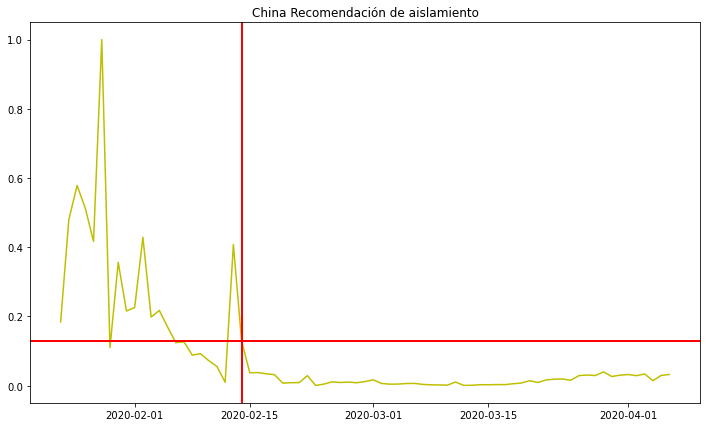

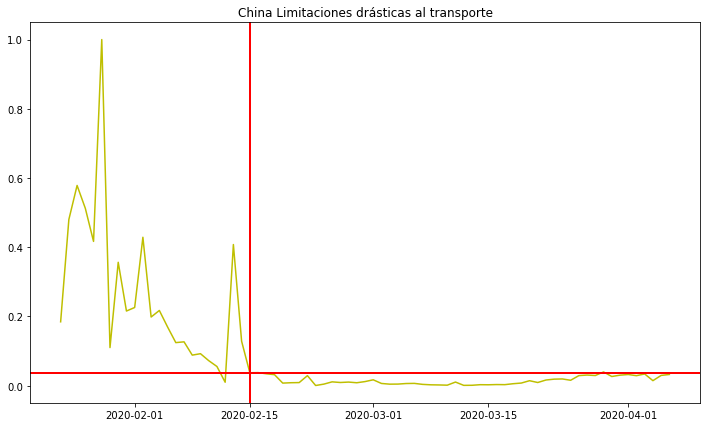

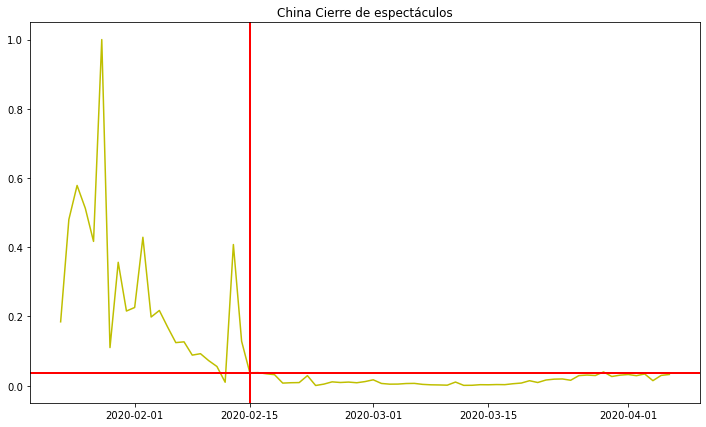

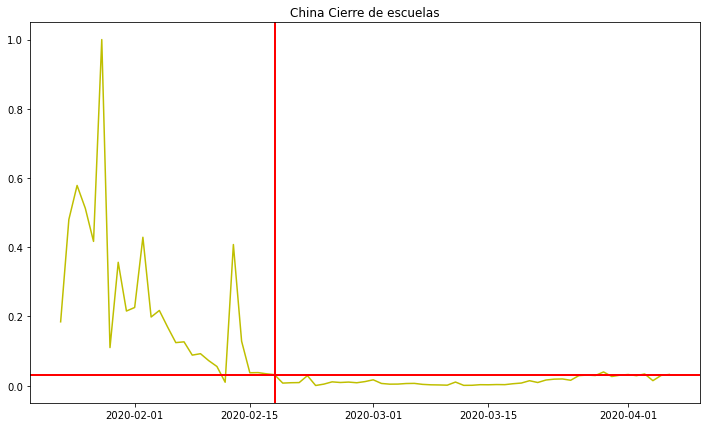

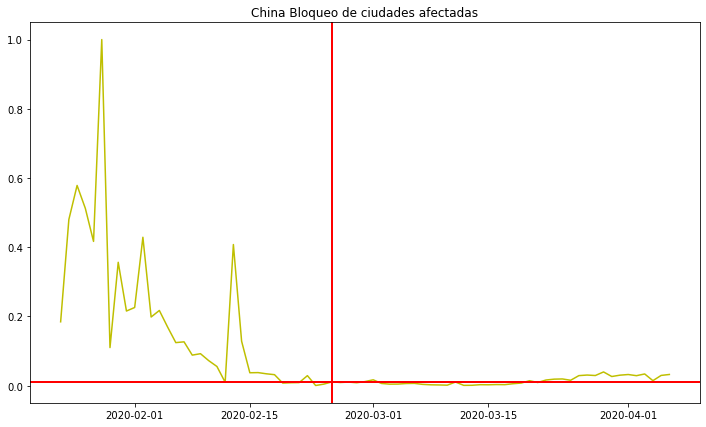

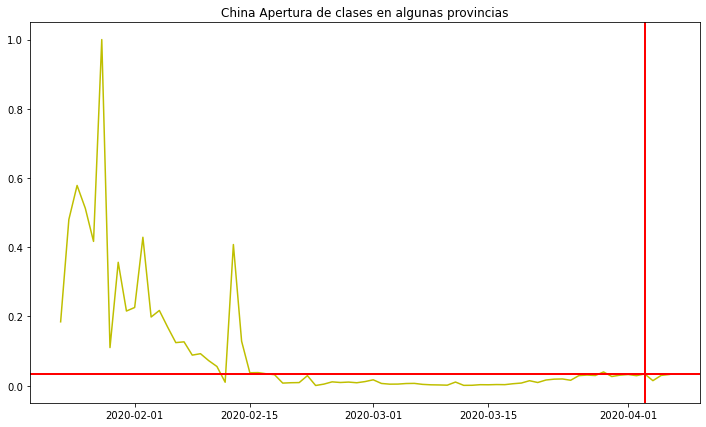

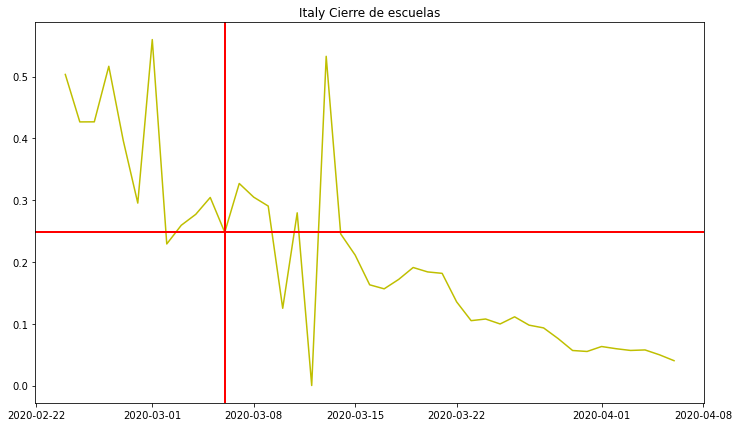

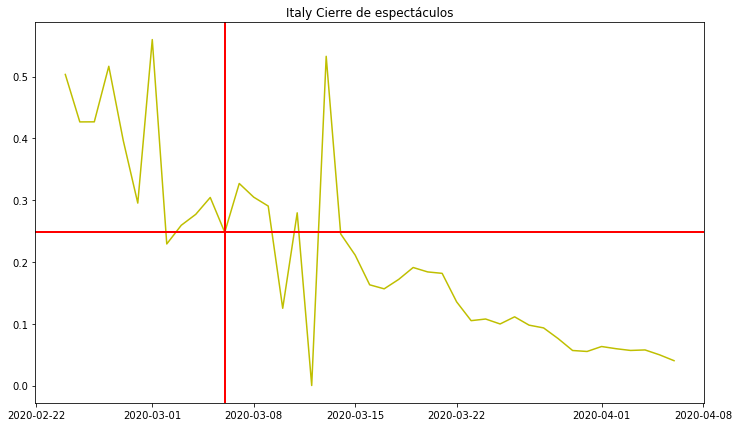

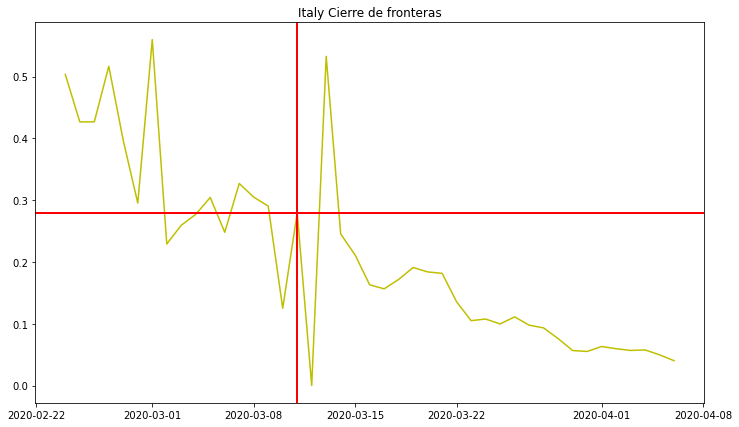

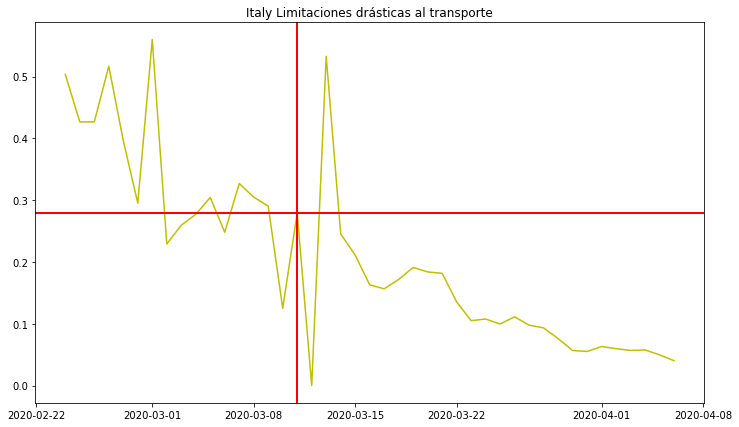

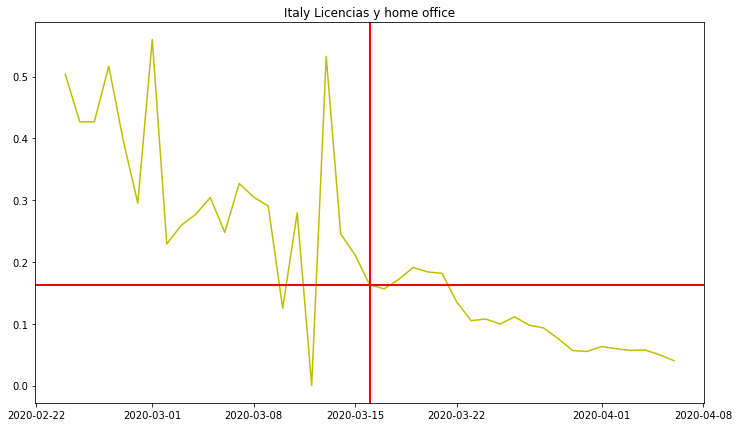

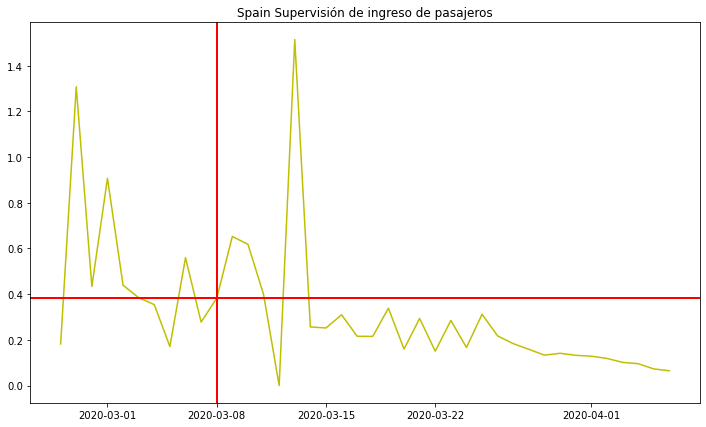

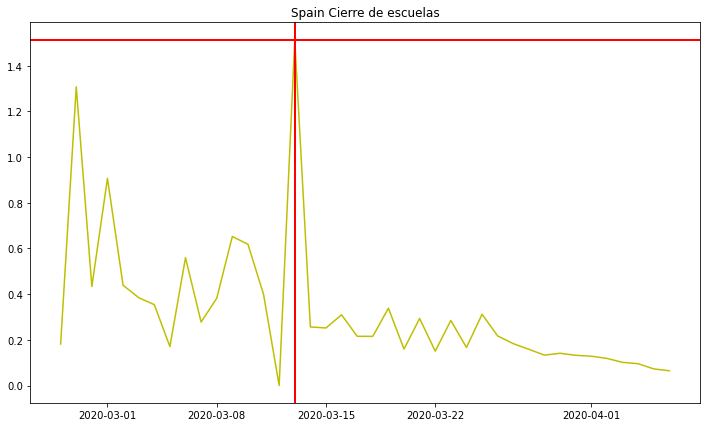

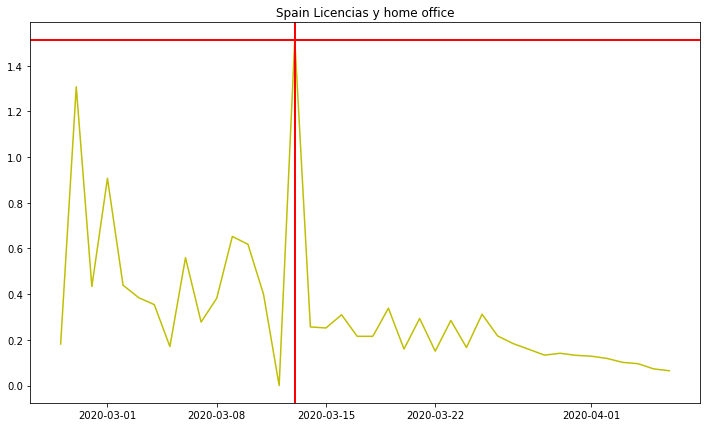

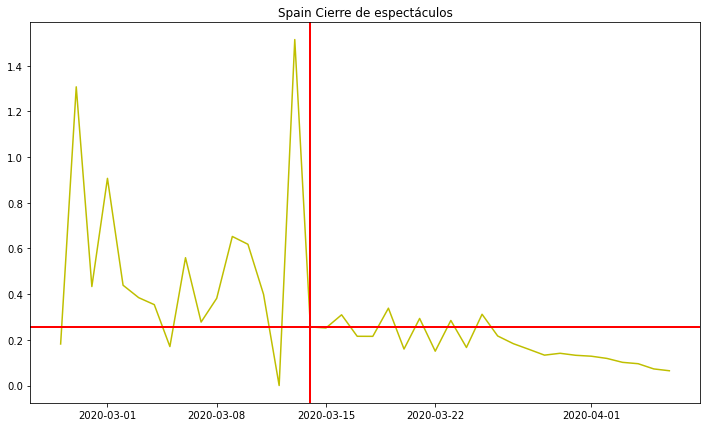

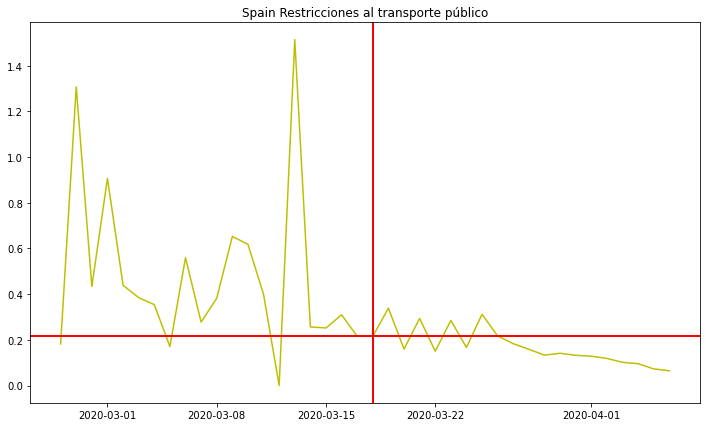

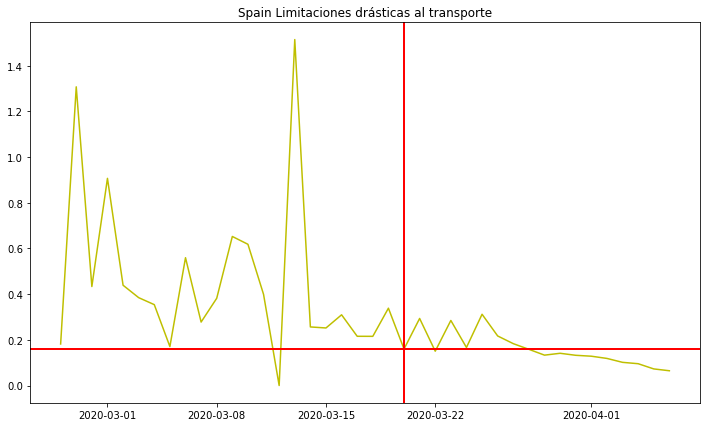

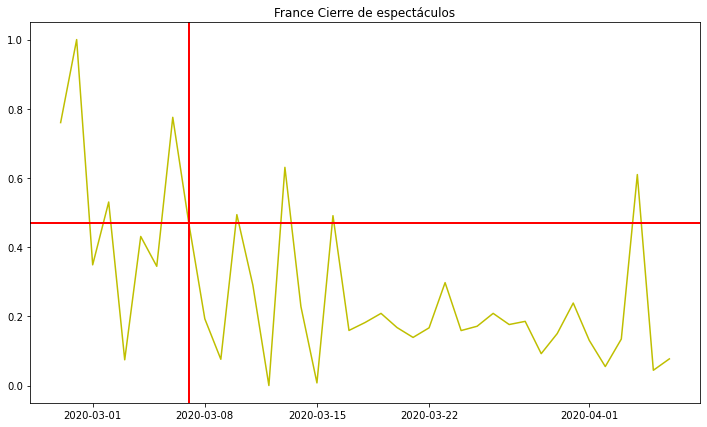

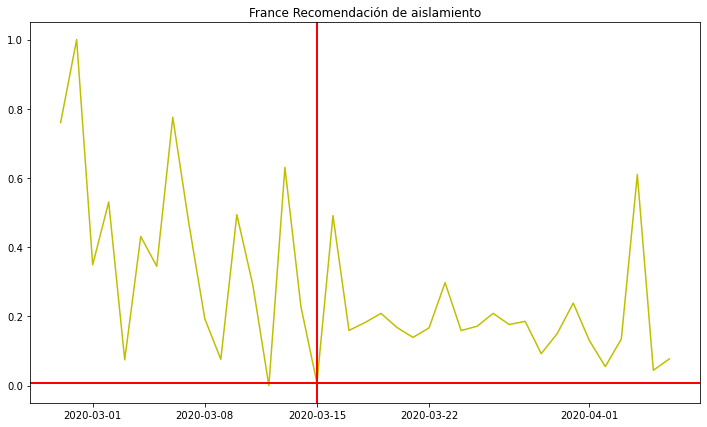

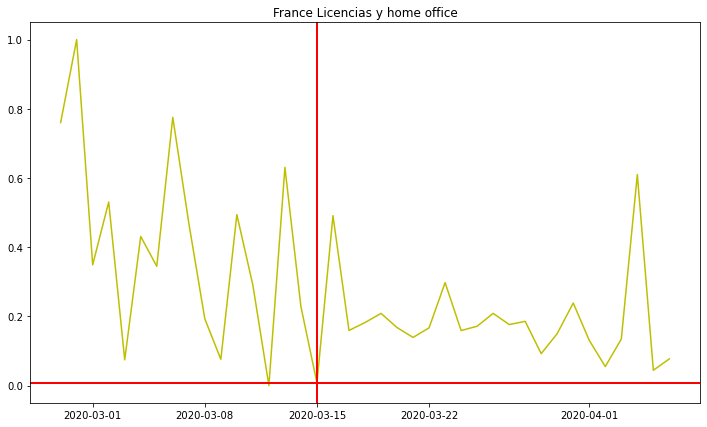

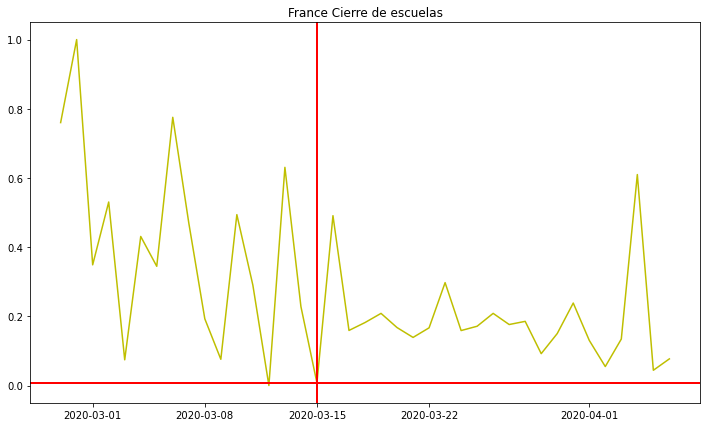

In [110]:
for country in ["China","Italy", "Spain","France"]:
    plts = prueba[prueba.CountryExp == country].copy()
    for measure in plts[~plts["Government Measure"].isna()]["Government Measure"].unique():
        fig, ax1 = plt.subplots(figsize=(12, 7))
        plts.reset_index(inplace=True)
        i = plts.loc[:,["DateRep","Infected_per_day"]].copy()
        plts.set_index("DateRep", inplace=True)
        i.set_index("DateRep", inplace=True)
        ax1.plot(i, color='y', Label="Infected_per_day")
        plt.title(country + " " + measure)
        event = plts.loc[(plts.loc[:,"Government Measure"]==measure),'Infected_per_day'].copy()
        plt.axvline(x=event.index, linewidth=2, color='r') 
        plt.axhline(y=event.values, linewidth=2, color='r') 


In [111]:
europe_values = mean_method[mean_method.CountryExp.isin(["Spain","France","Italy"])]

In [112]:
europe_values

,CountryExp,DateRep,DayOfGovM,DaysFromFirst,Government Measure,Infected_per_day,MeasureEffect
6,Spain,2020-03-08,2020-03-08,36.0,Supervisión de ingreso de pasajeros,0.381898,0.629869
7,Spain,2020-03-13,2020-03-13,41.0,Cierre de escuelas,1.514608,0.448502
8,Spain,2020-03-13,2020-03-13,41.0,Licencias y home office,1.514608,0.487554
9,Spain,2020-03-14,2020-03-14,42.0,Cierre de espectáculos,0.256416,0.325953
10,Spain,2020-03-18,2020-03-18,46.0,Restricciones al transporte público,0.215253,0.336058
11,Spain,2020-03-20,2020-03-20,48.0,Limitaciones drásticas al transporte,0.159601,0.327867
12,Italy,2020-03-06,2020-03-06,35.0,Cierre de escuelas,0.247929,0.421938
13,Italy,2020-03-06,2020-03-06,35.0,Cierre de espectáculos,0.247929,0.440415
14,Italy,2020-03-11,2020-03-11,40.0,Cierre de fronteras,0.279449,0.396668
15,Italy,2020-03-11,2020-03-11,40.0,Limitaciones drásticas al transporte,0.279449,0.415949


In [113]:
european_group = europe_values.groupby("Government Measure").mean().reset_index()

In [114]:
european_group["Region"] = "Europe"

In [115]:
european_group

,Government Measure,DaysFromFirst,Infected_per_day,MeasureEffect,Region
0,Cierre de escuelas,42.333333,0.590025,0.452186,Europe
1,Cierre de espectáculos,40.000000,0.324729,0.383086,Europe
2,Cierre de fronteras,40.000000,0.279449,0.396668,Europe
3,Licencias y home office,45.666667,0.561700,0.435171,Europe
4,Limitaciones drásticas al transporte,44.000000,0.219525,0.371908,Europe
5,Recomendación de aislamiento,51.000000,0.007539,0.472164,Europe
6,Restricciones al transporte público,46.000000,0.215253,0.336058,Europe
7,Supervisión de ingreso de pasajeros,36.000000,0.381898,0.629869,Europe


In [116]:
lista = []
for measure in european_group["Government Measure"].unique():
    lista.append(len(europe_values[europe_values["Government Measure"] == measure]))

european_group["Amount_implementing"] = lista

In [117]:
european_group

,Government Measure,DaysFromFirst,Infected_per_day,MeasureEffect,Region,Amount_implementing
0,Cierre de escuelas,42.333333,0.590025,0.452186,Europe,3
1,Cierre de espectáculos,40.000000,0.324729,0.383086,Europe,3
2,Cierre de fronteras,40.000000,0.279449,0.396668,Europe,1
3,Licencias y home office,45.666667,0.561700,0.435171,Europe,3
4,Limitaciones drásticas al transporte,44.000000,0.219525,0.371908,Europe,2
5,Recomendación de aislamiento,51.000000,0.007539,0.472164,Europe,1
6,Restricciones al transporte público,46.000000,0.215253,0.336058,Europe,1
7,Supervisión de ingreso de pasajeros,36.000000,0.381898,0.629869,Europe,1


In [118]:
china_values = mean_method[mean_method.CountryExp.isin(["China"])][["Government Measure", "DaysFromFirst", "Infected_per_day",
                                                                  "MeasureEffect"]]

In [119]:
china_values["Region"] = "China"

In [120]:
china_values

,Government Measure,DaysFromFirst,Infected_per_day,MeasureEffect,Region
0,Recomendación de aislamiento,23.0,0.128330,0.065308,China
1,Limitaciones drásticas al transporte,24.0,0.037137,0.058098,China
2,Cierre de espectáculos,24.0,0.037137,0.061818,China
3,Cierre de escuelas,27.0,0.031604,0.060584,China
4,Bloqueo de ciudades afectadas,34.0,0.010846,0.075849,China
5,Apertura de clases en algunas provincias,72.0,0.033674,0.288175,China


In [121]:
concat = pd.concat([european_group,china_values] , axis=0, ignore_index=True, sort=True)

In [122]:
concat

,Amount_implementing,DaysFromFirst,Government Measure,Infected_per_day,MeasureEffect,Region
0,3.0,42.333333,Cierre de escuelas,0.590025,0.452186,Europe
1,3.0,40.000000,Cierre de espectáculos,0.324729,0.383086,Europe
2,1.0,40.000000,Cierre de fronteras,0.279449,0.396668,Europe
3,3.0,45.666667,Licencias y home office,0.561700,0.435171,Europe
4,2.0,44.000000,Limitaciones drásticas al transporte,0.219525,0.371908,Europe
5,1.0,51.000000,Recomendación de aislamiento,0.007539,0.472164,Europe
6,1.0,46.000000,Restricciones al transporte público,0.215253,0.336058,Europe
7,1.0,36.000000,Supervisión de ingreso de pasajeros,0.381898,0.629869,Europe
8,NaN,23.000000,Recomendación de aislamiento,0.128330,0.065308,China
9,NaN,24.000000,Limitaciones drásticas al transporte,0.037137,0.058098,China


In [123]:
concat.to_excel("efectos_cuarentena.xlsx")

In [124]:
covid19_data[covid19_data.CountryExp =="China"]

,DateRep,CountryExp,NewConfCases_cum,NewDeaths_cum,NewRecovered_cum,NewConfCases,NewDeaths,NewRecovered,activos,Infected_per_day
1198,2020-01-22,China,547.0,17.0,28.0,547.0,17.0,28.0,0.0,0.000000
1199,2020-01-23,China,639.0,18.0,30.0,92.0,1.0,2.0,499.0,0.184369
1200,2020-01-24,China,916.0,26.0,36.0,277.0,8.0,6.0,577.0,0.480069
1201,2020-01-25,China,1399.0,42.0,39.0,483.0,16.0,3.0,835.0,0.578443
1202,2020-01-26,China,2062.0,56.0,49.0,663.0,14.0,10.0,1294.0,0.512365
...,...,...,...,...,...,...,...,...,...,...
1269,2020-04-02,China,82432.0,3322.0,76565.0,71.0,6.0,160.0,2474.0,0.028698
1270,2020-04-03,China,82511.0,3326.0,76760.0,79.0,4.0,195.0,2346.0,0.033674
1271,2020-04-04,China,82543.0,3330.0,76946.0,32.0,4.0,186.0,2235.0,0.014318
1272,2020-04-05,China,82602.0,3333.0,77207.0,59.0,3.0,261.0,2003.0,0.029456
